In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt


We are importing the libraries required for us.

In [3]:
df=pd.read_csv(r"C:/Users/Lenovo/Downloads/Machine Learning/Logistic/heart-1.csv")

We are loading the data.

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

age:age of the patient</br>
sex:gender of the patient</br>
cp:chest pain type</br>
trestbps:resting blood presure(in mm Hg)</br>
chol:cholestrol(mg/dl)</br>
fbs:fasting blood sugar</br>
restecg:resting electrocardiographic results</br>
thalach:Maximum heart rate achieved</br>
exang:	Exercise-induced angina</br>
oldpeak:ST depression induced by exercise relative to rest</br>
slope:	The slope of the peak exercise</br>
ca:Number of major vessels (0–3) colored by fluoroscopy</br>
thal:	Thalassemia</br>
target:	Presence of heart disease</br>

We are checking for columns and data in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This give us the count of the dataset, null vlaue and data type of the dataset.

In [6]:
df.shape

(303, 14)

Here we have 303 rows and 14 columns.

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Here we take analyse count of null values,mean,standard deviation,median,mode and quartiles for each column in the dataset.

In [8]:
df.shape

(303, 14)

In [9]:
df[df['target']==1].shape

(165, 14)

It returns the number of rows and columns where the 'target' column has a value of 1.

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Here we can get the columns in the dataset.

In [11]:
df.isna().sum().sum()

0

We are checking for thr null value in the data.It seems we dont have no missing vlaue.

In [12]:
df.duplicated().sum()

1

We are checking for dulpicate value in the datsaet. It shows we have 1 duplicate value.

In [13]:
df.drop_duplicates(inplace=True)

We are droppin the duplicate value from the dataset.So it doesnot affect the processing of the data.

In [14]:
df.duplicated().sum()

0

Now we have 0 null values.

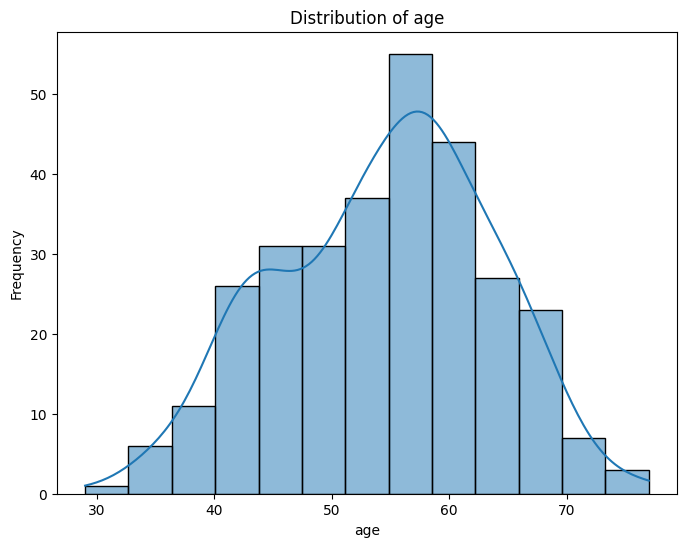

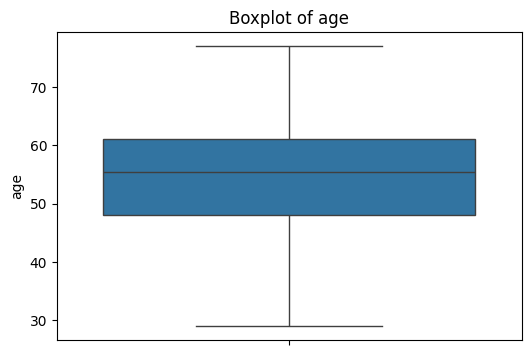

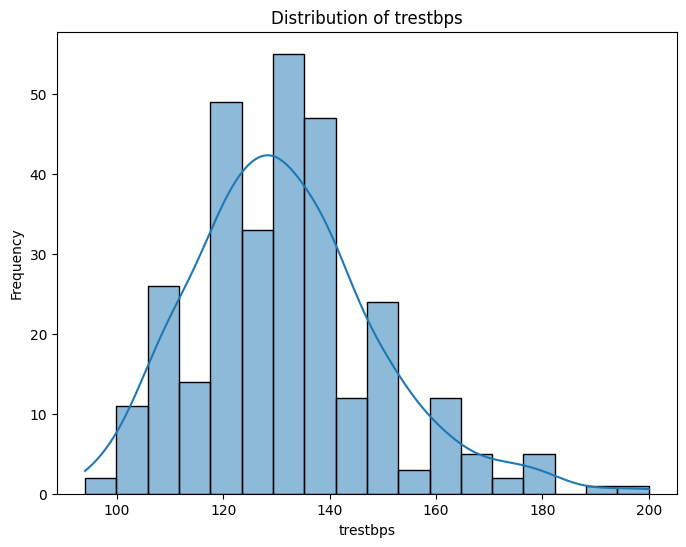

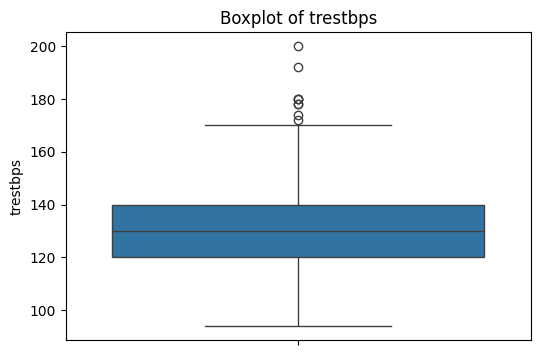

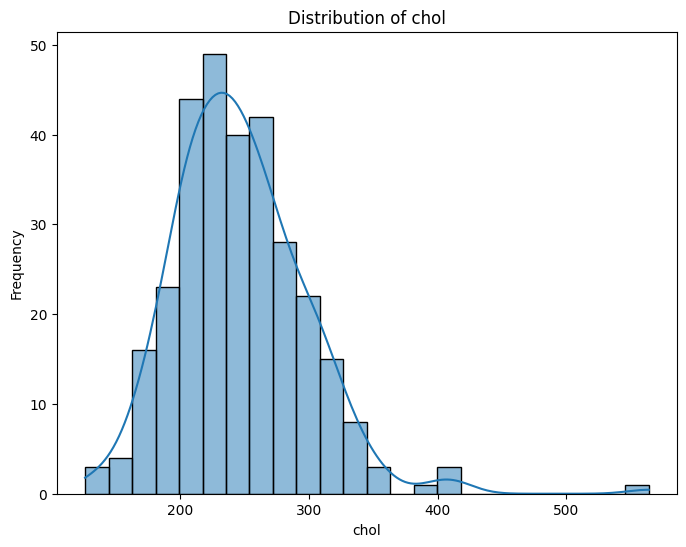

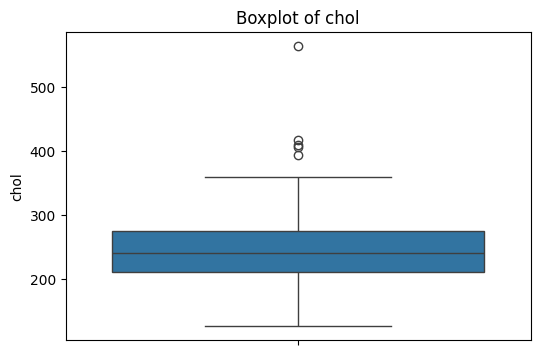

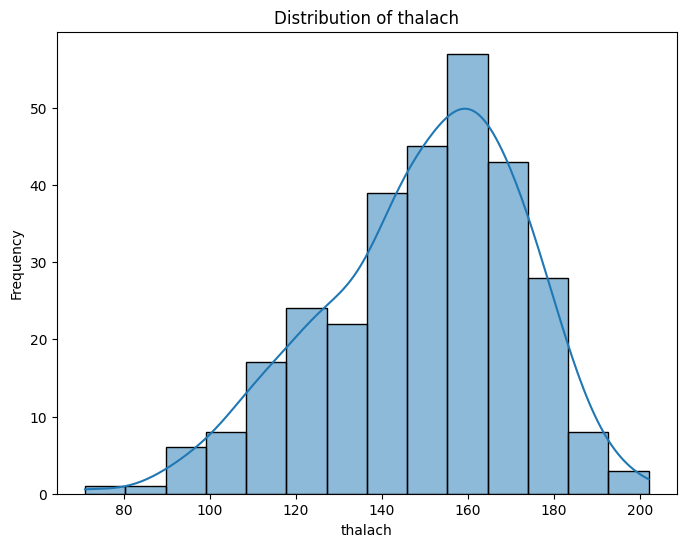

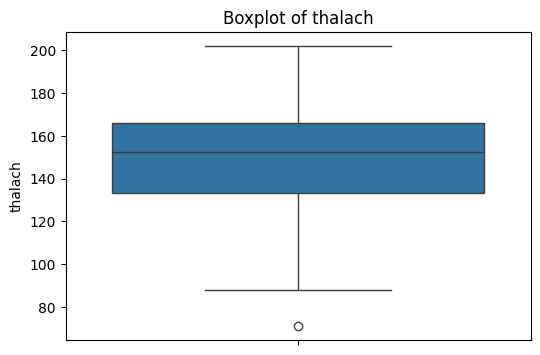

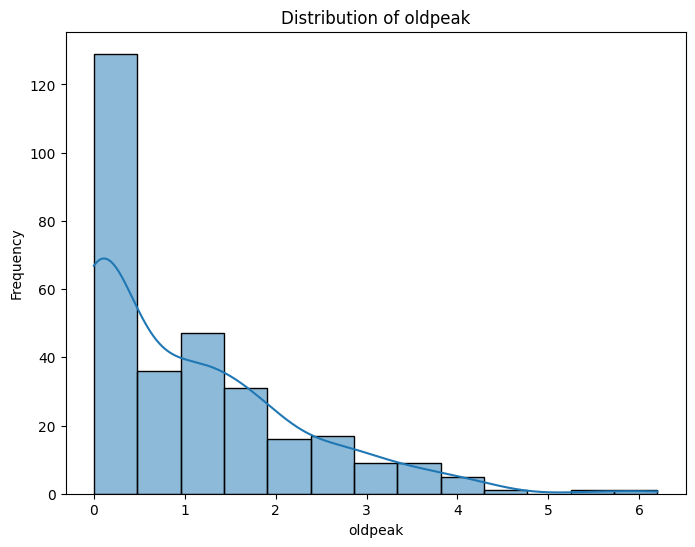

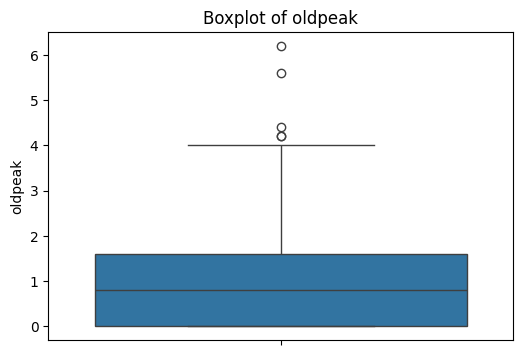

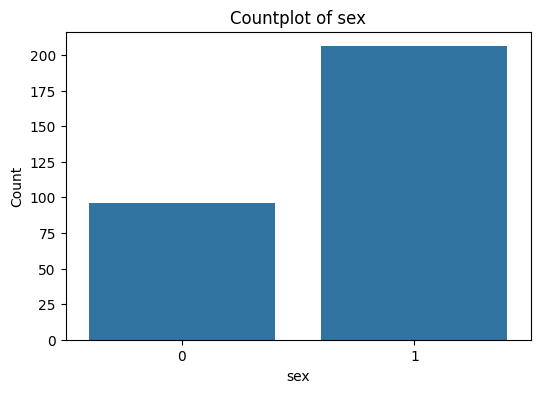

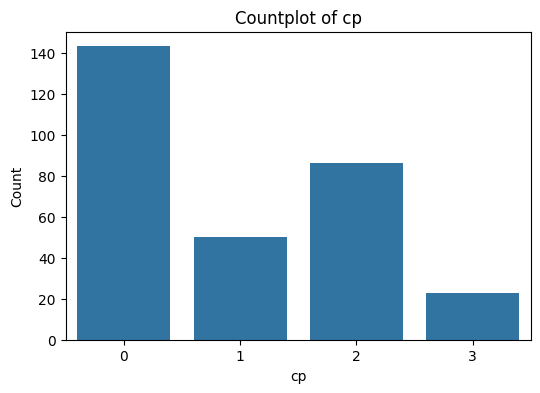

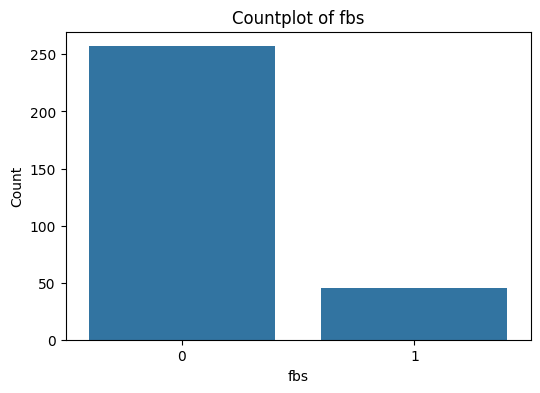

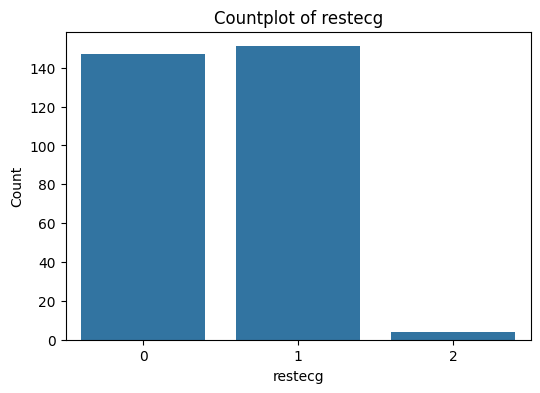

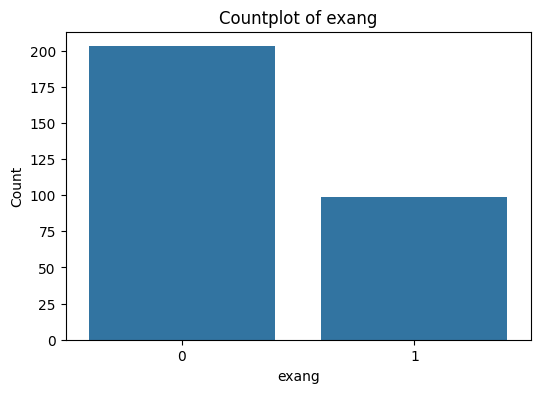

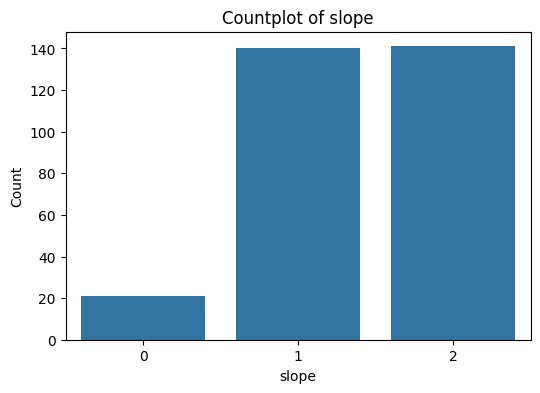

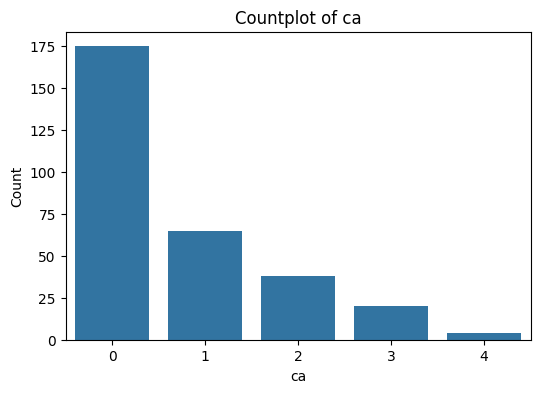

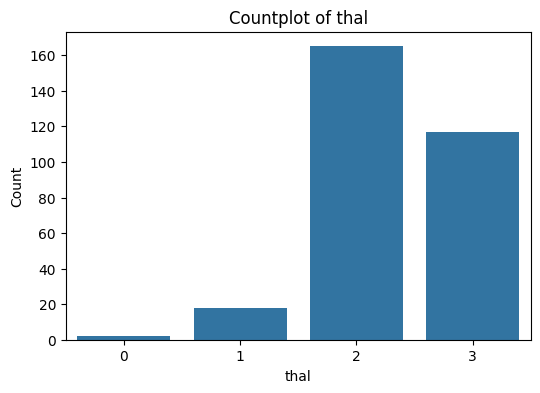

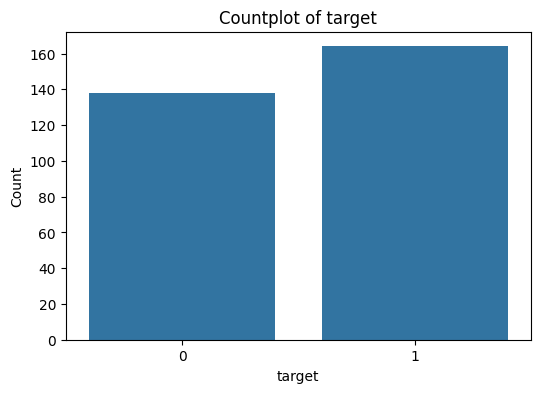

In [15]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)  # Histogram with KDE
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(6, 4))
  sns.boxplot(y=df[col])  # Box plot
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_features:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=df[col])  # Countplot
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

It visualizes the distribution of numerical features using histograms and boxplots to identify skewness and outliers, and shows the frequency of categorical variables using countplots to observe class distributions.

Text(0.5, 1.0, 'Age distribuition')

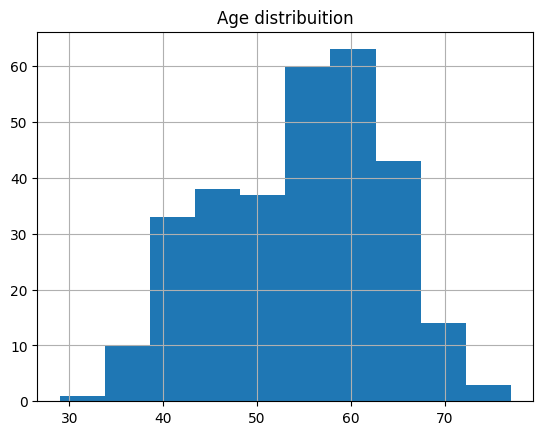

In [16]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')

It displays the distribution of the age variable, grouped into 10 bins, showing how age values are spread across the dataset.

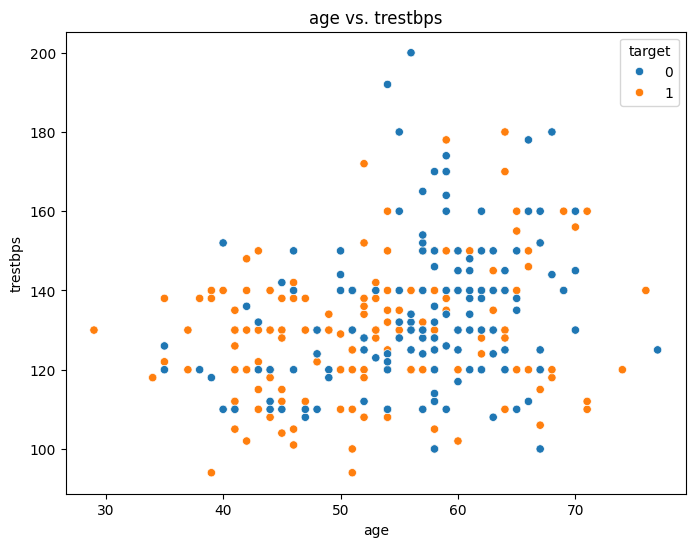

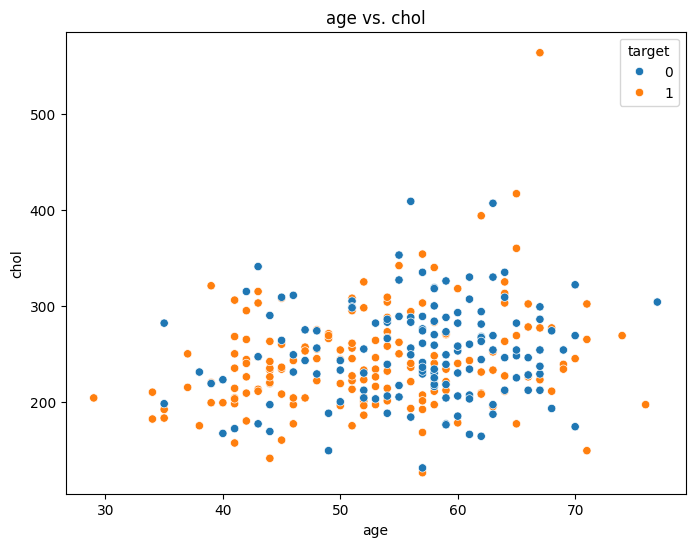

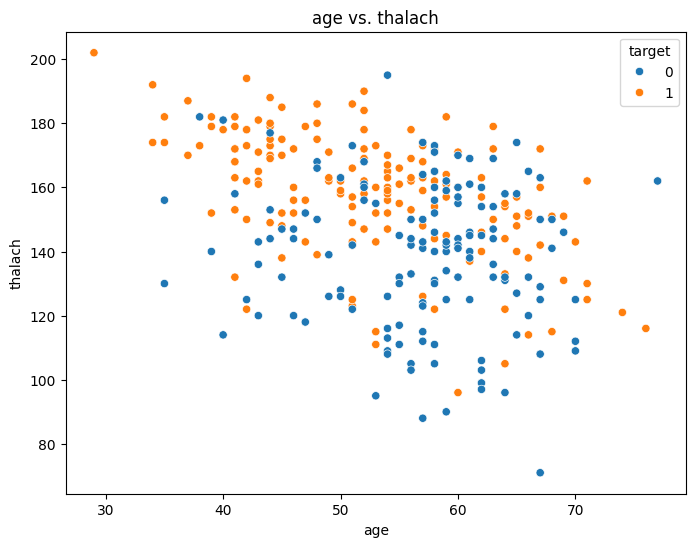

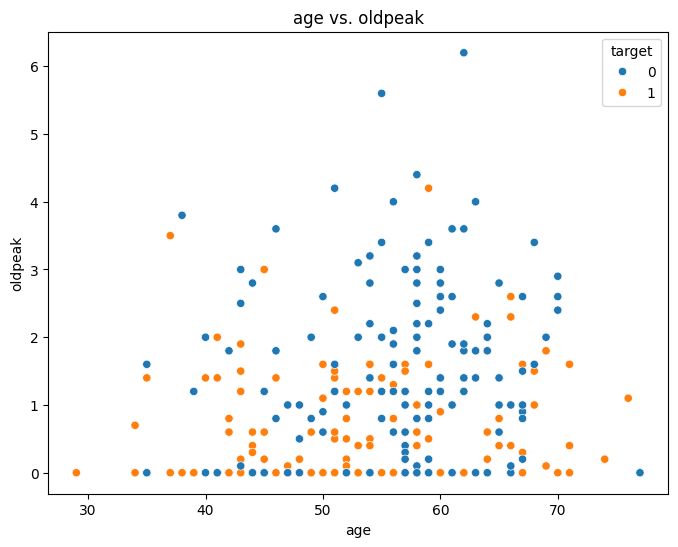

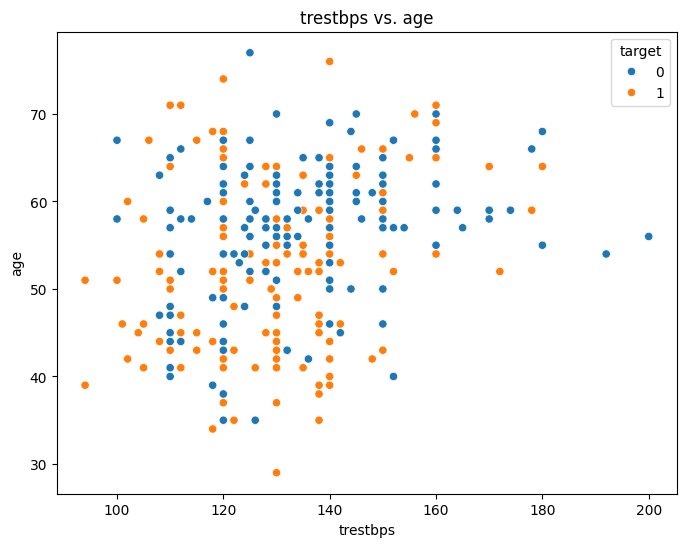

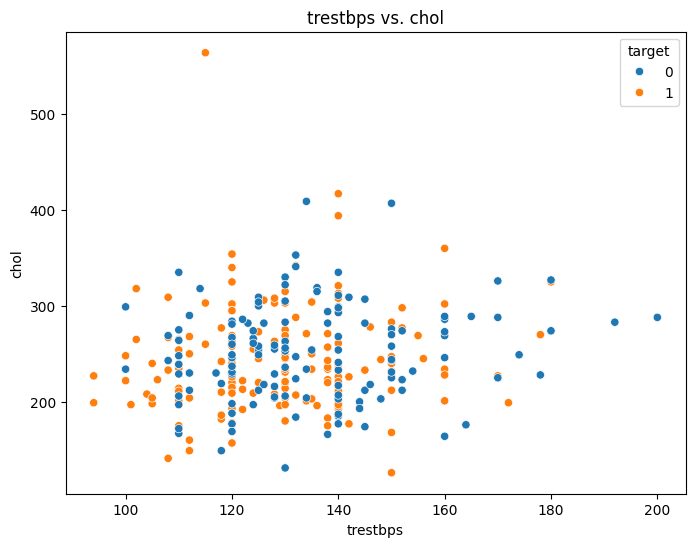

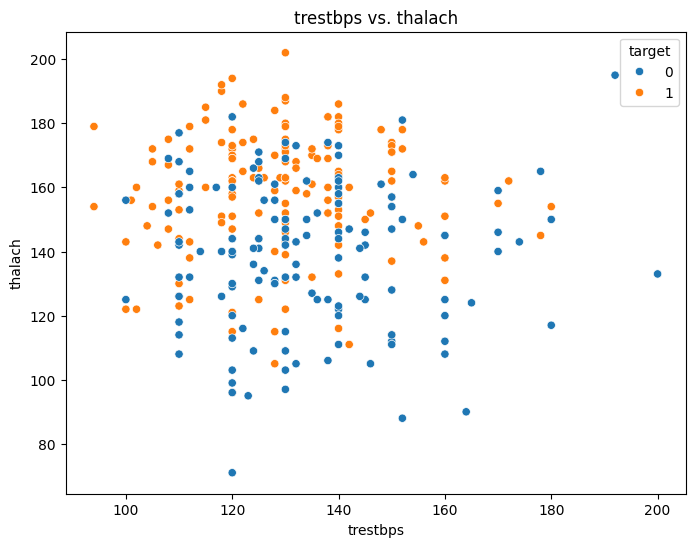

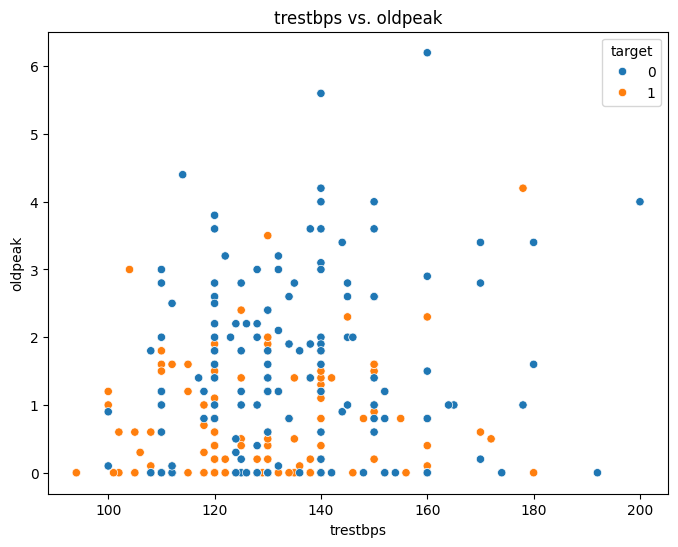

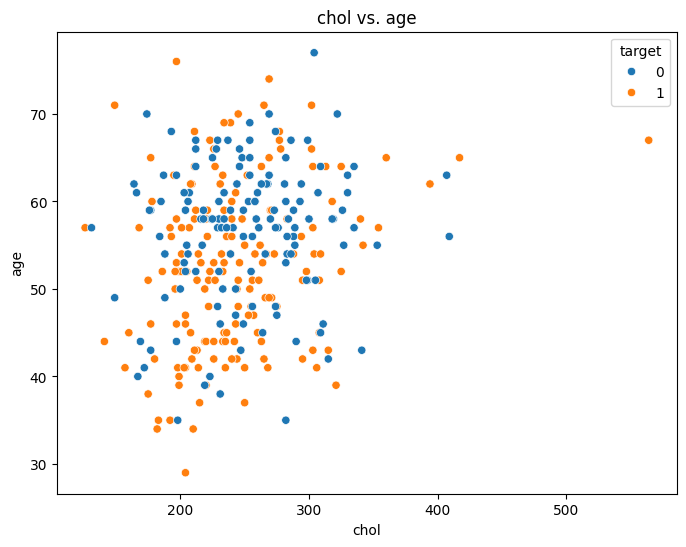

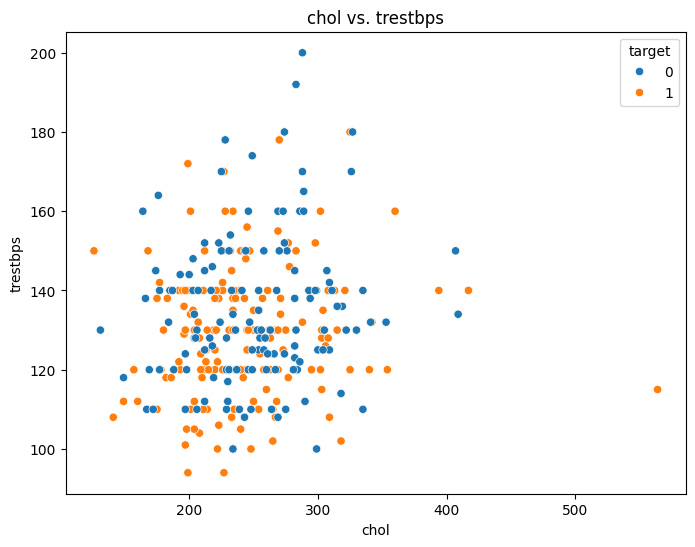

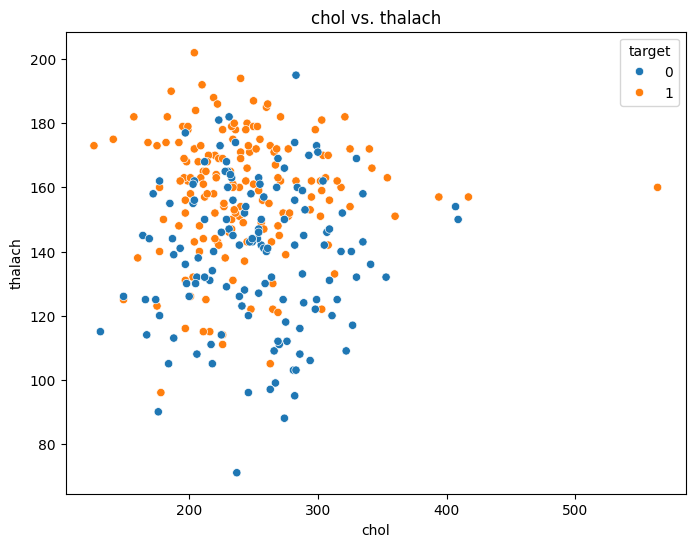

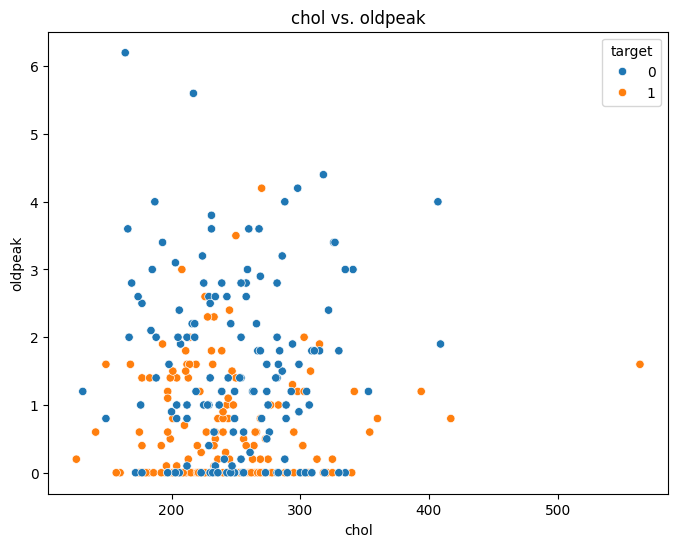

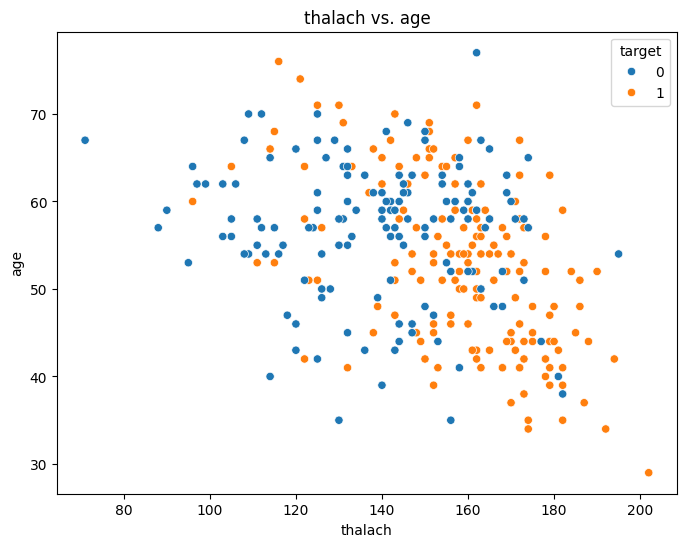

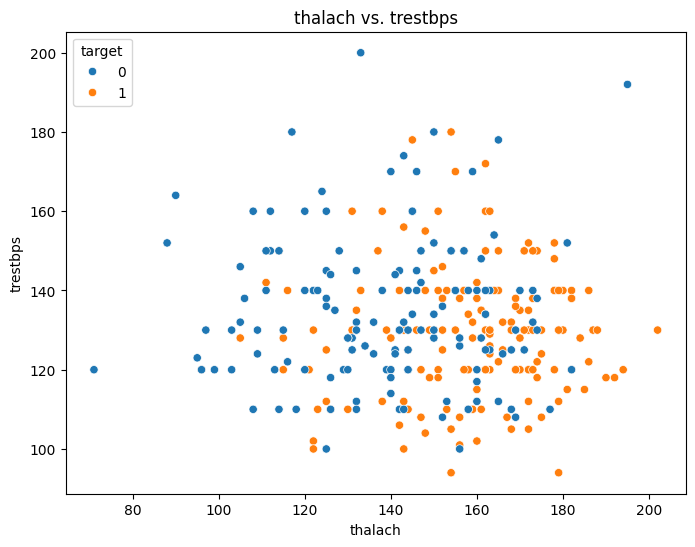

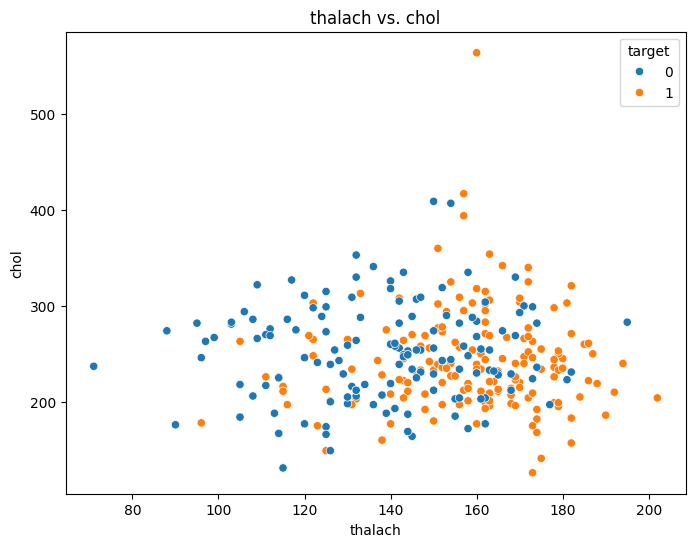

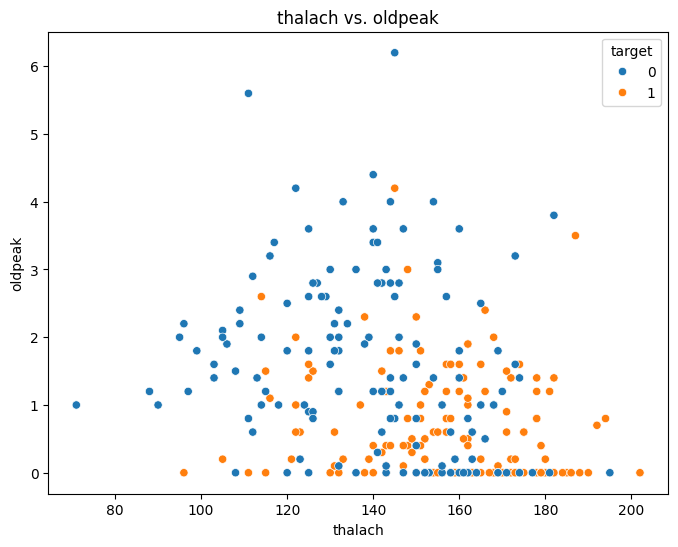

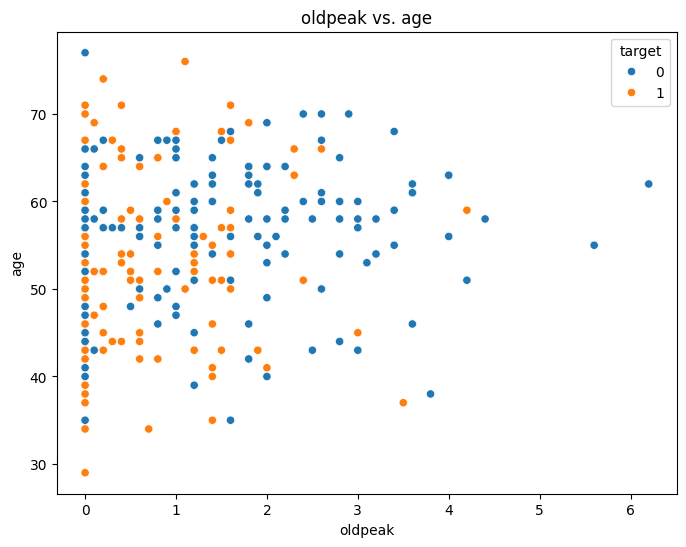

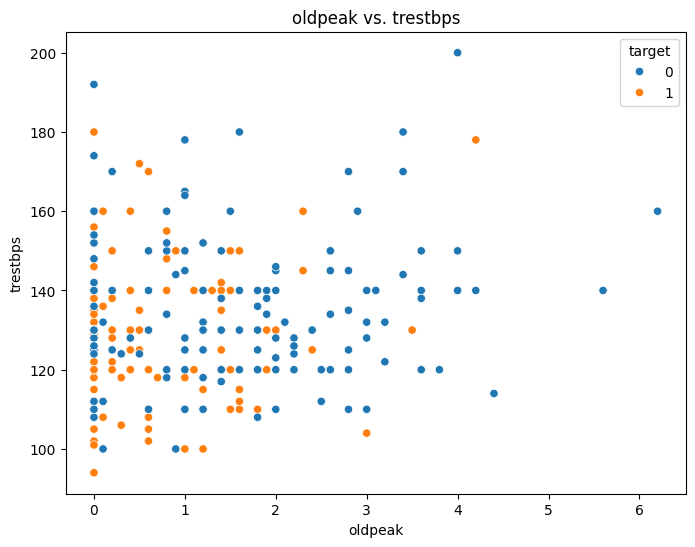

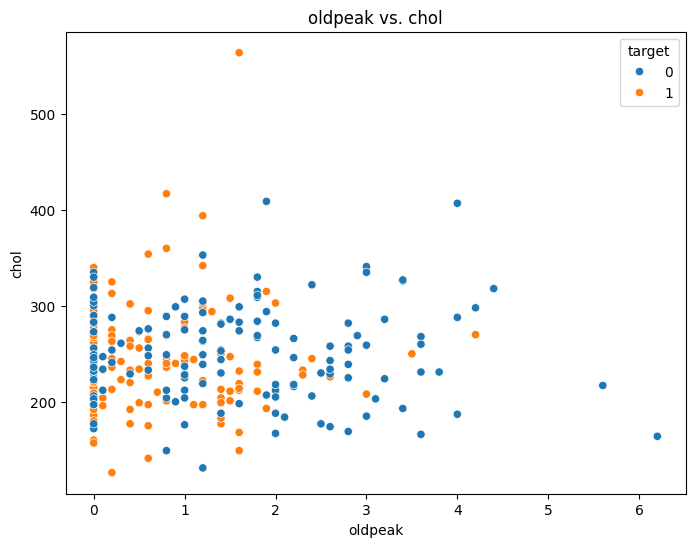

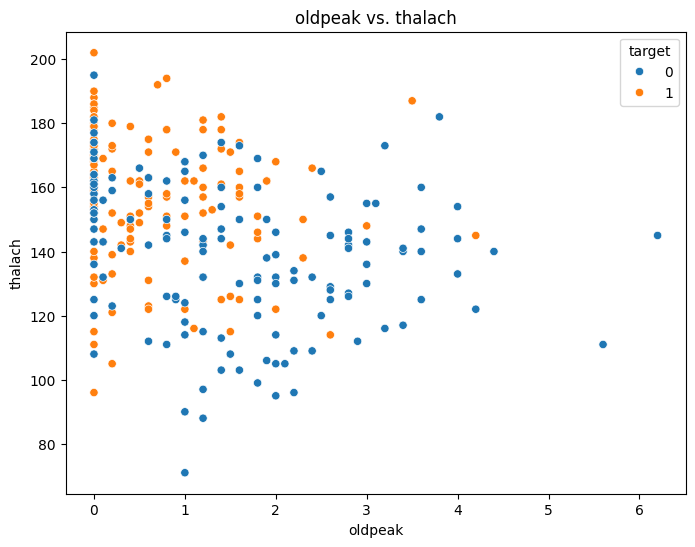

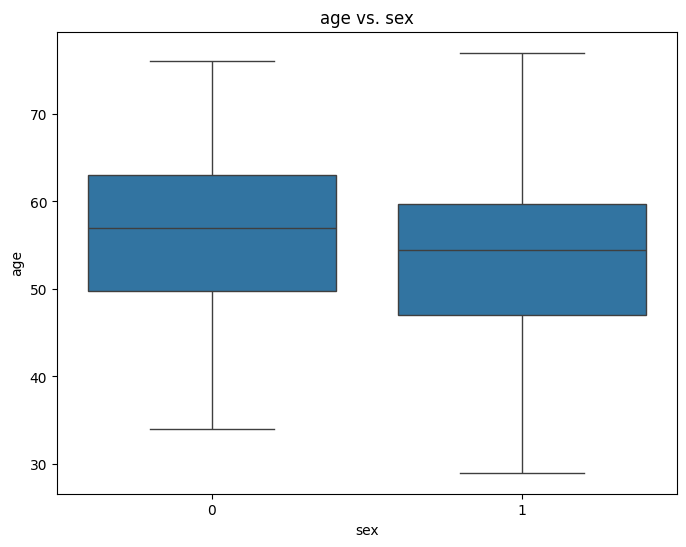

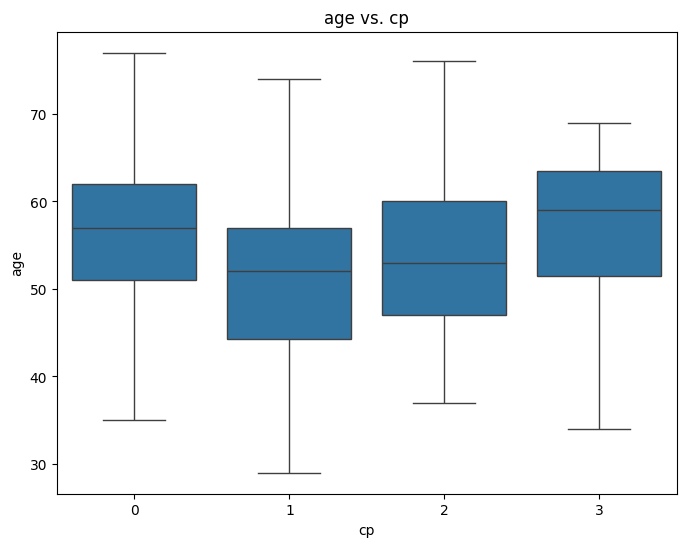

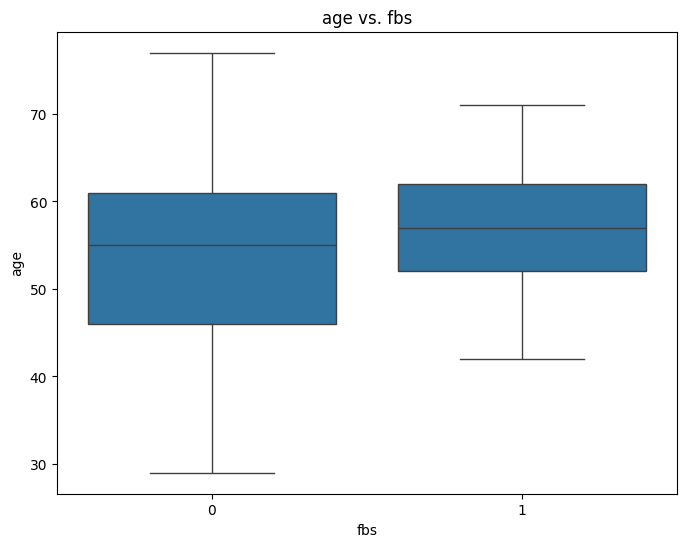

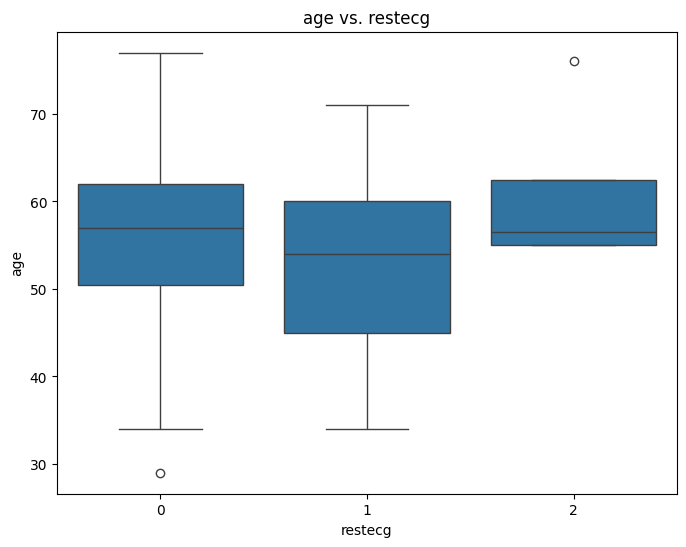

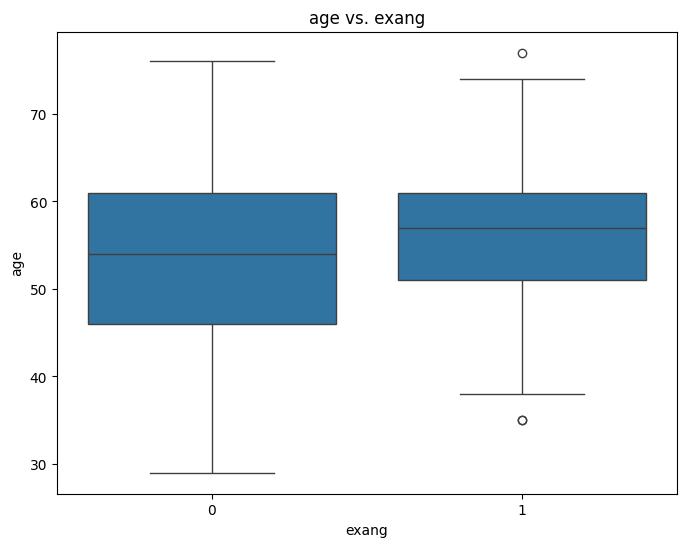

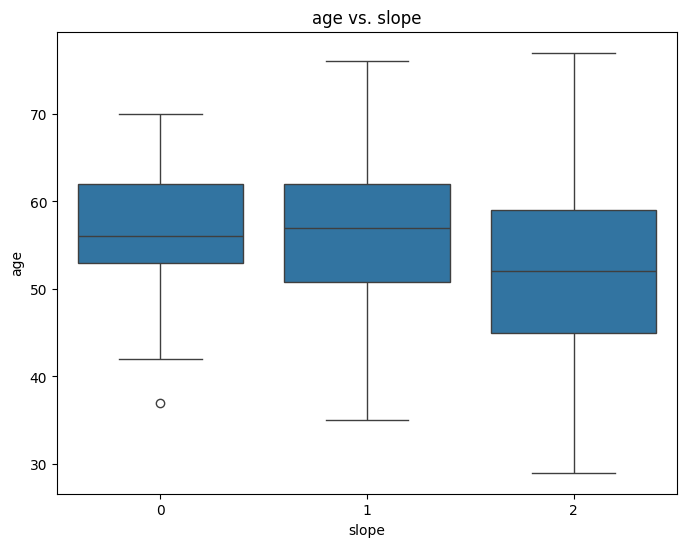

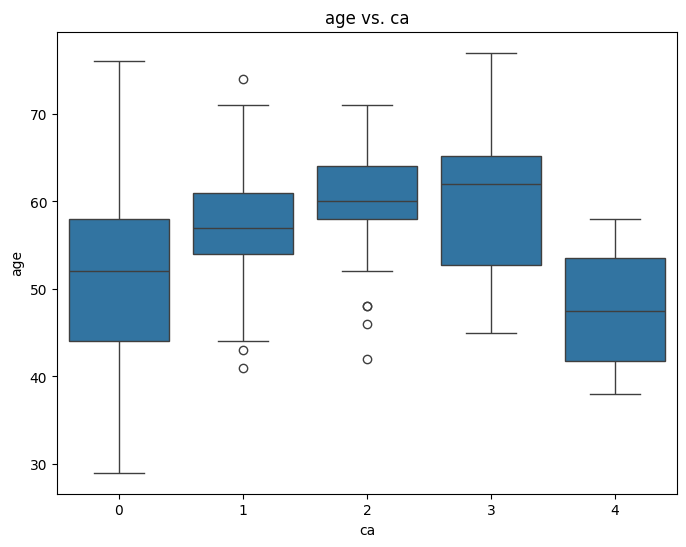

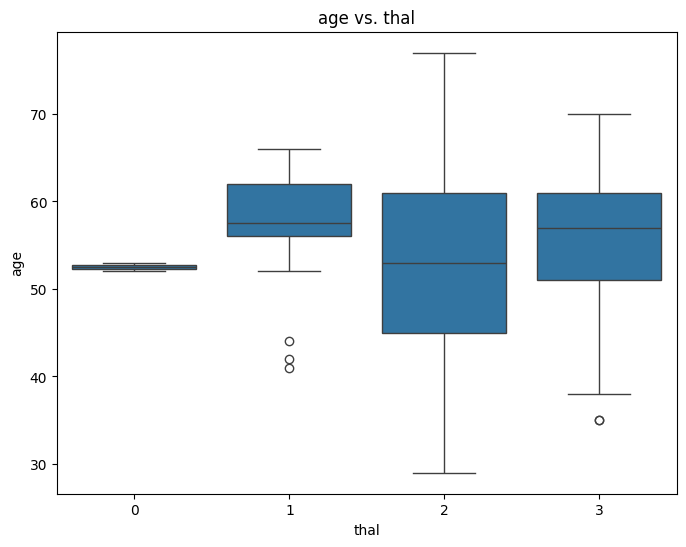

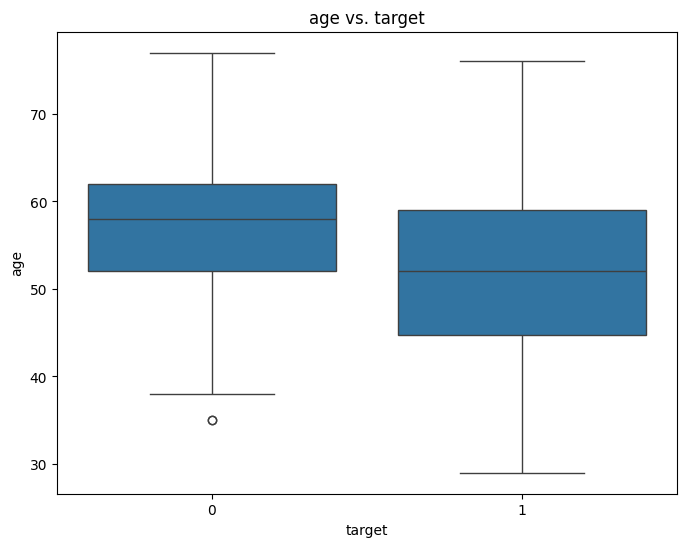

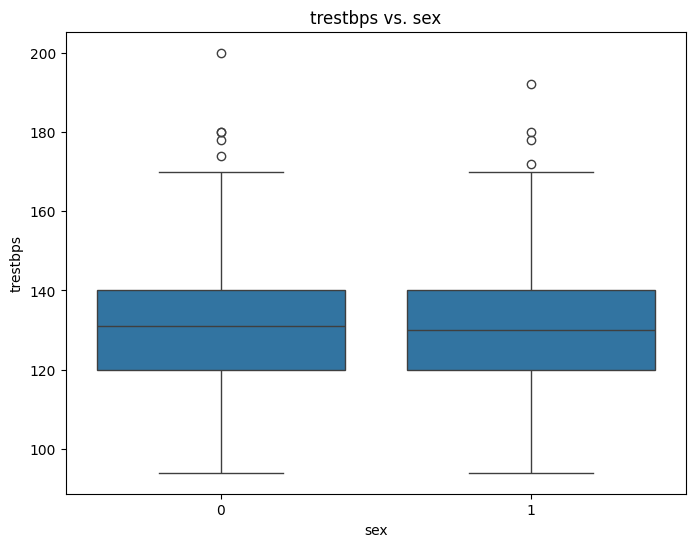

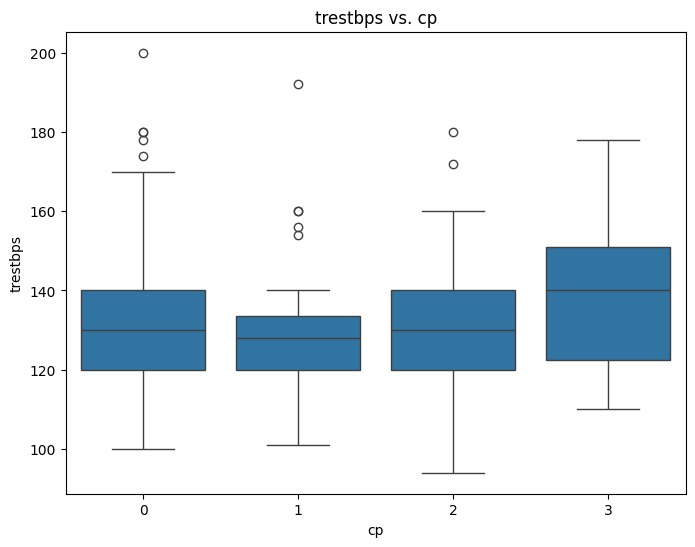

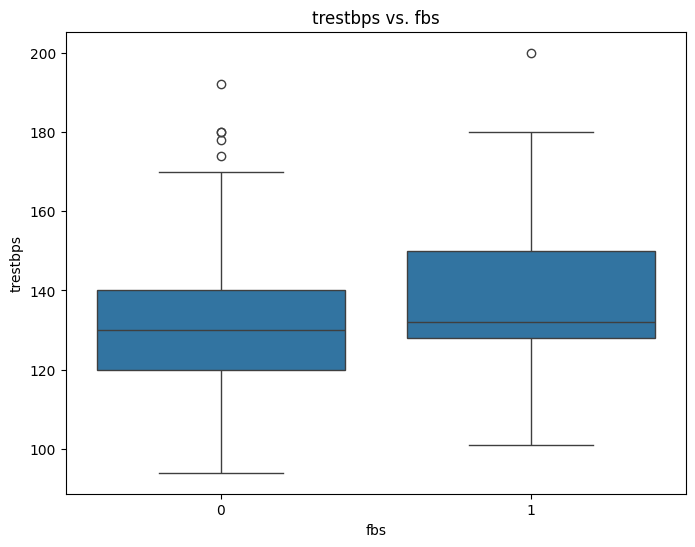

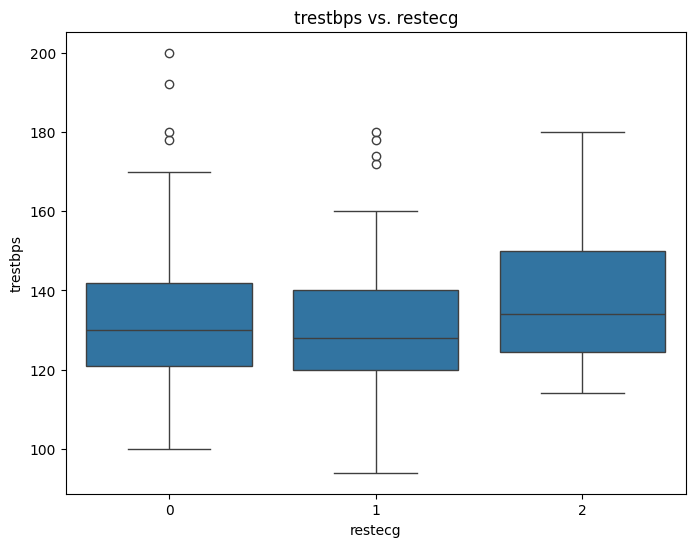

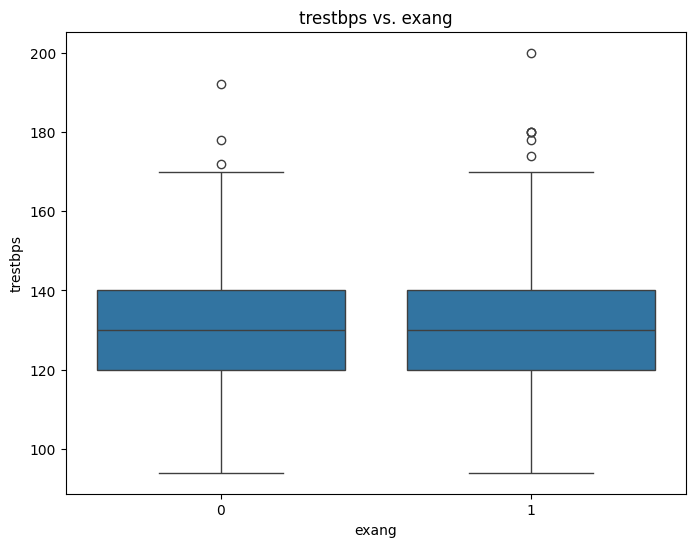

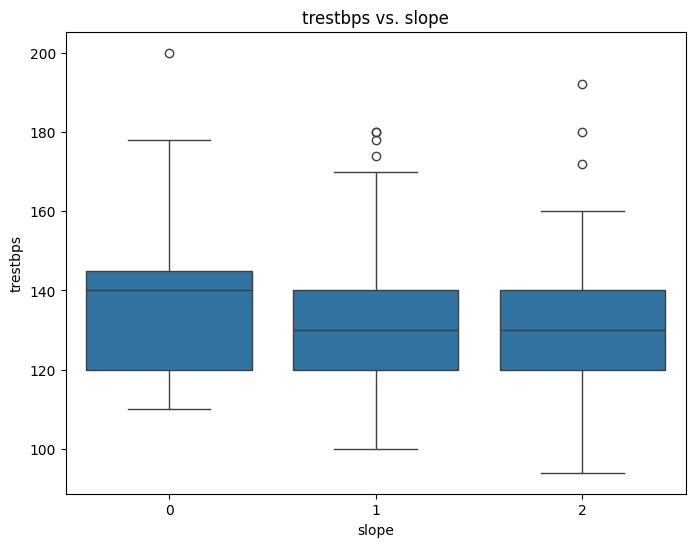

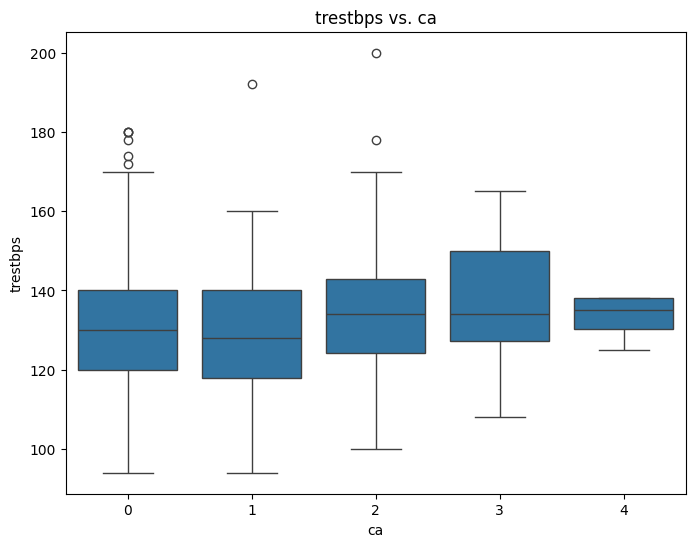

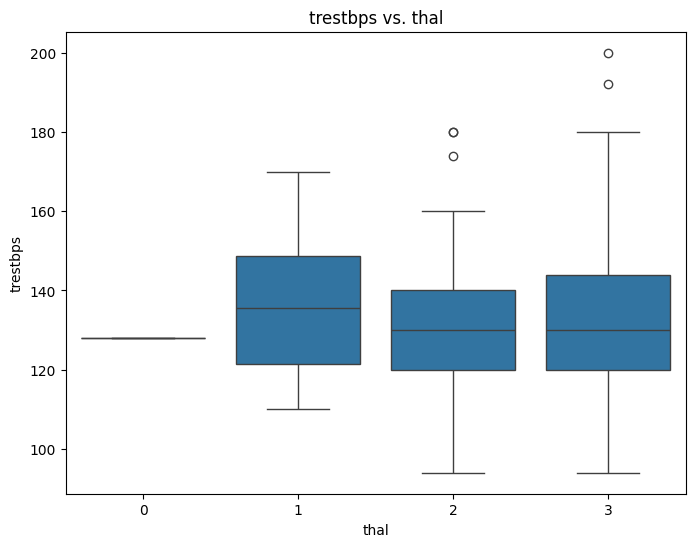

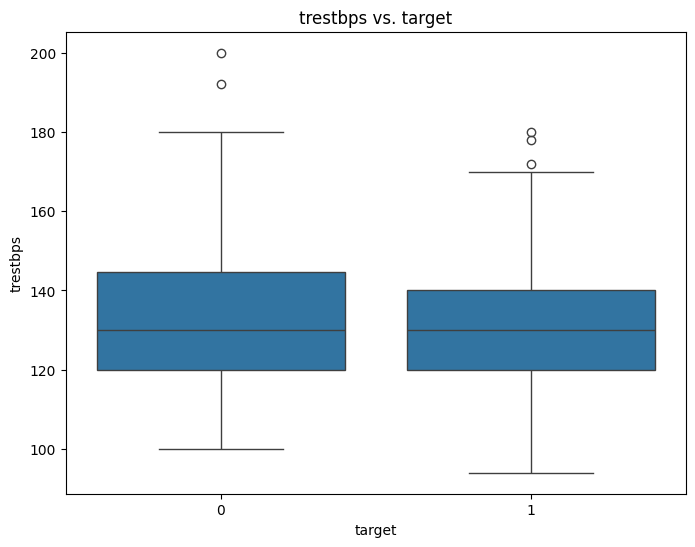

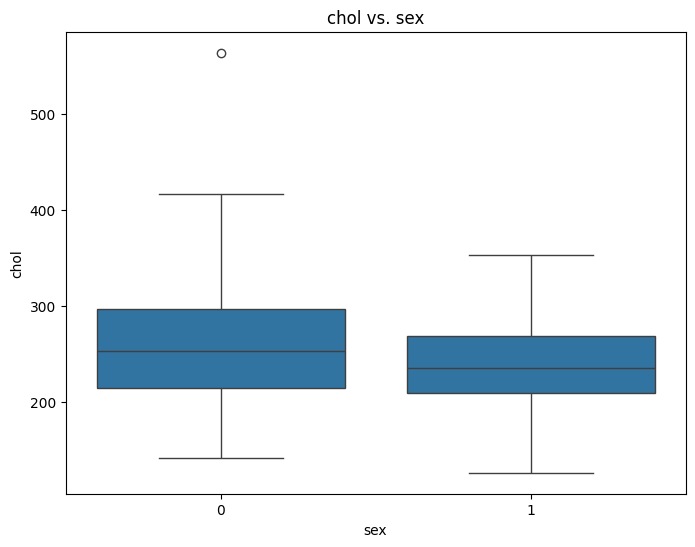

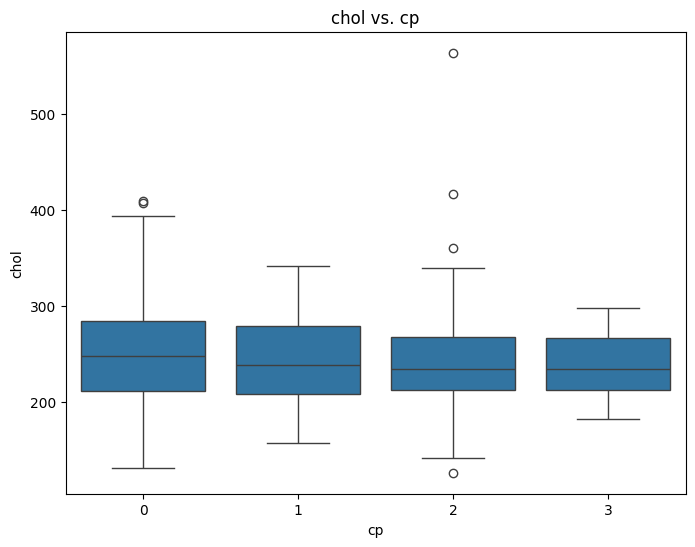

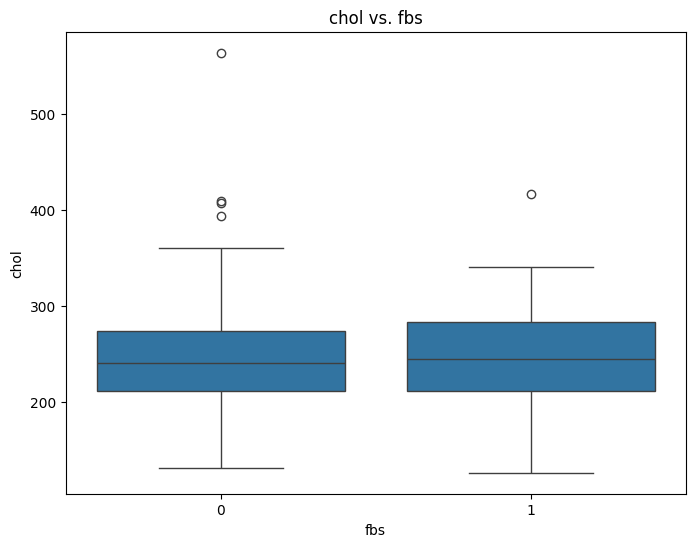

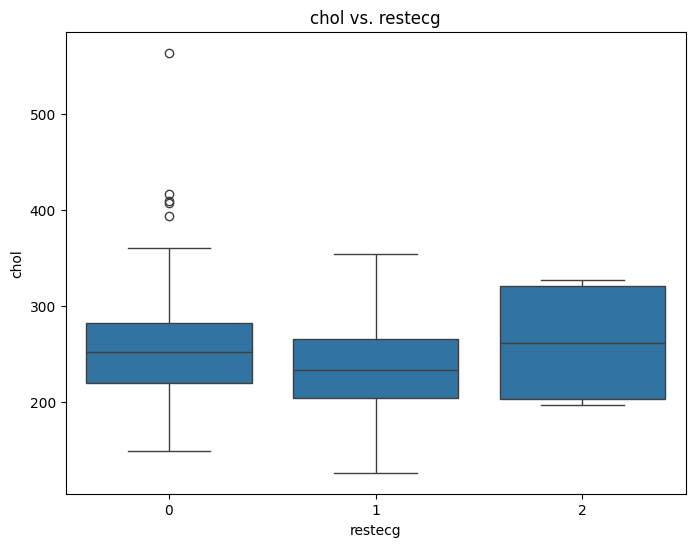

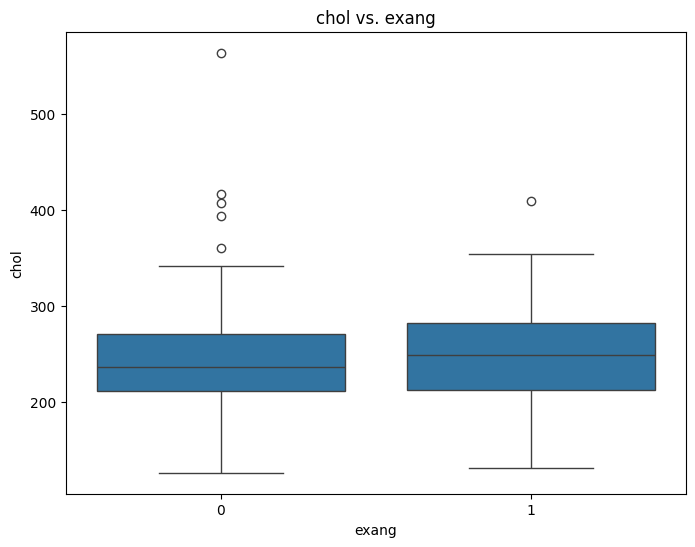

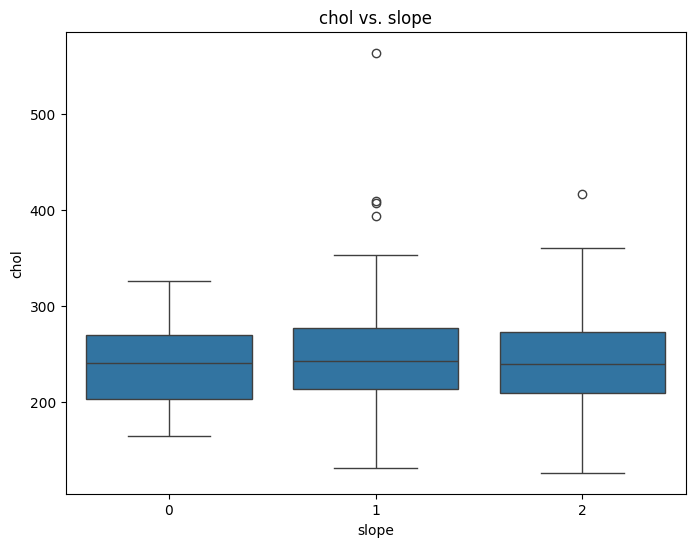

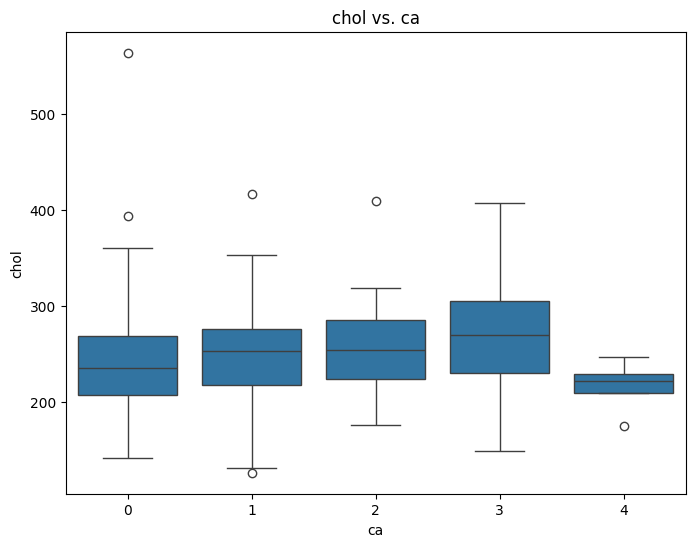

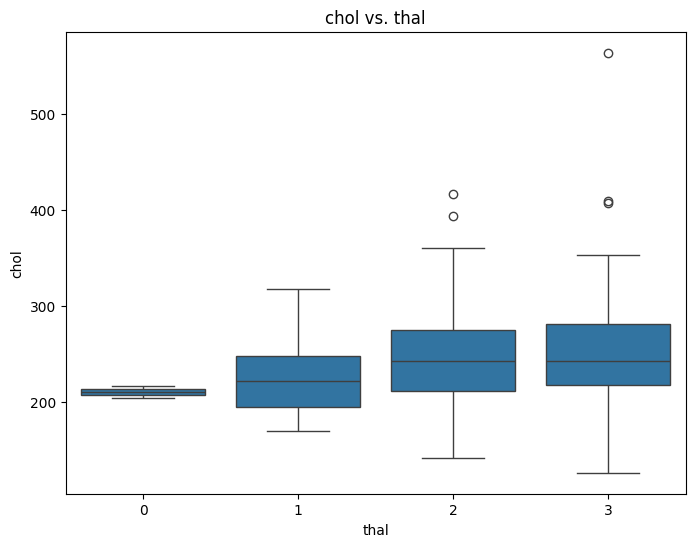

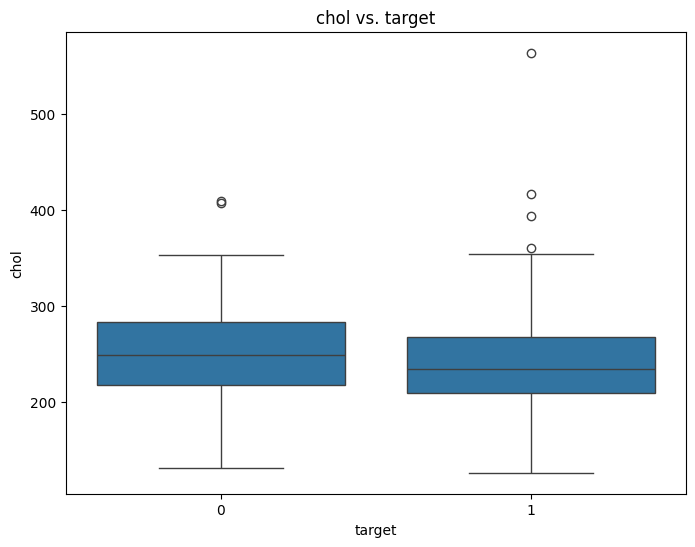

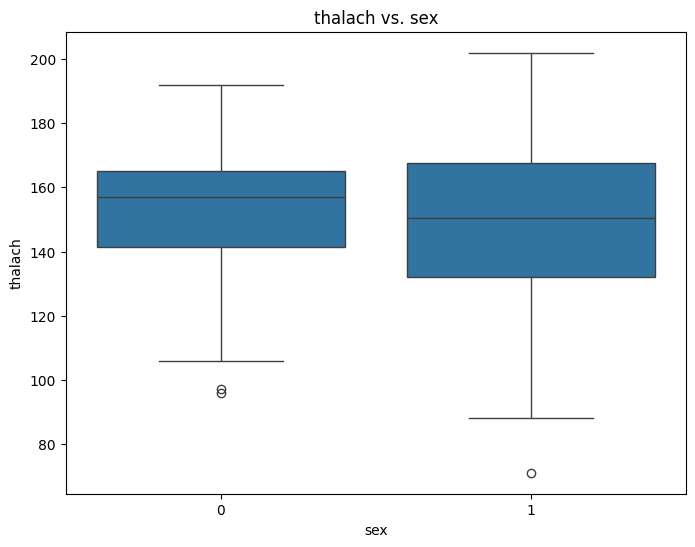

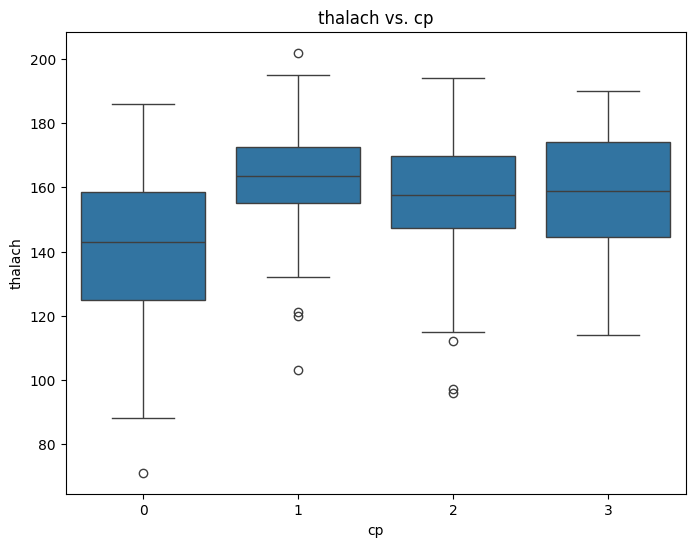

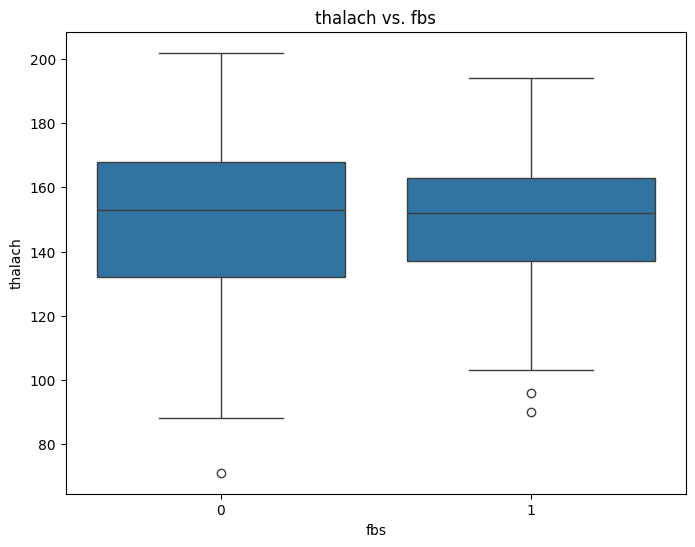

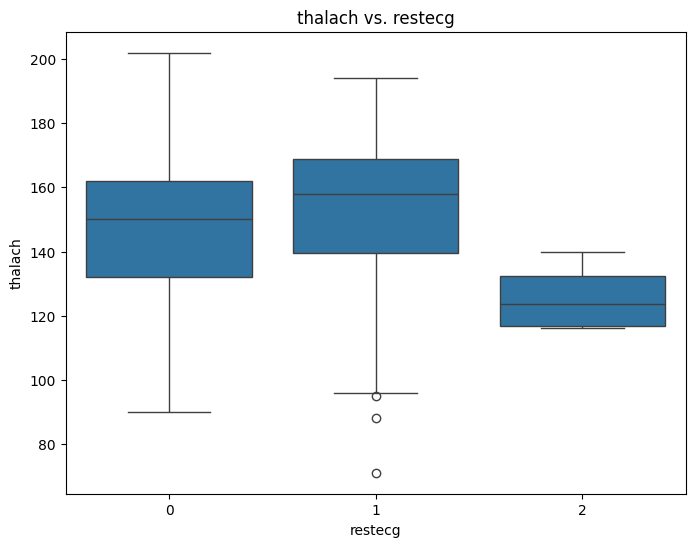

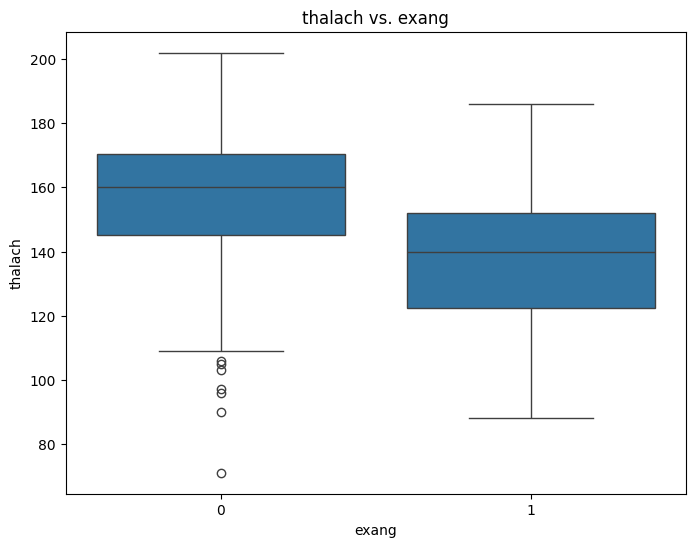

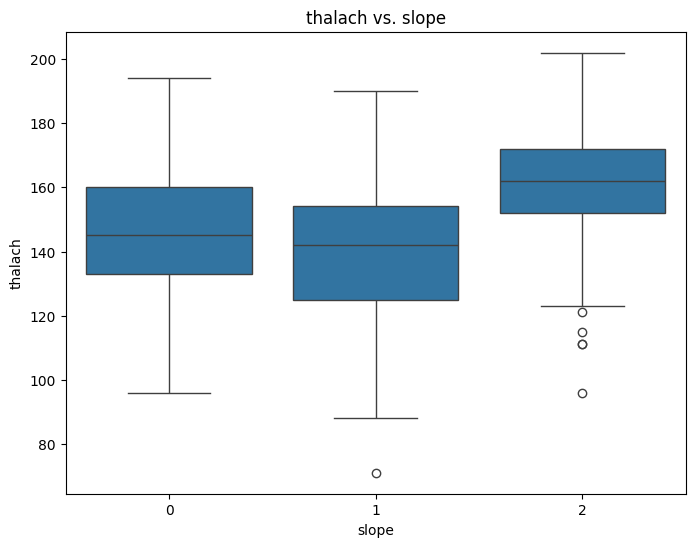

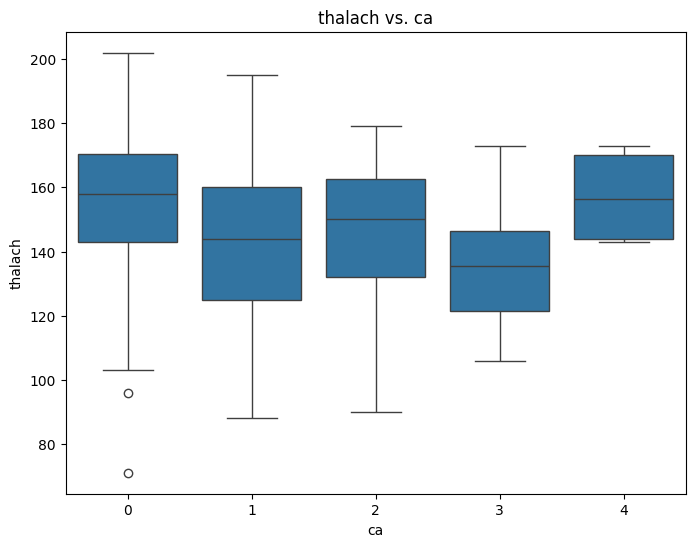

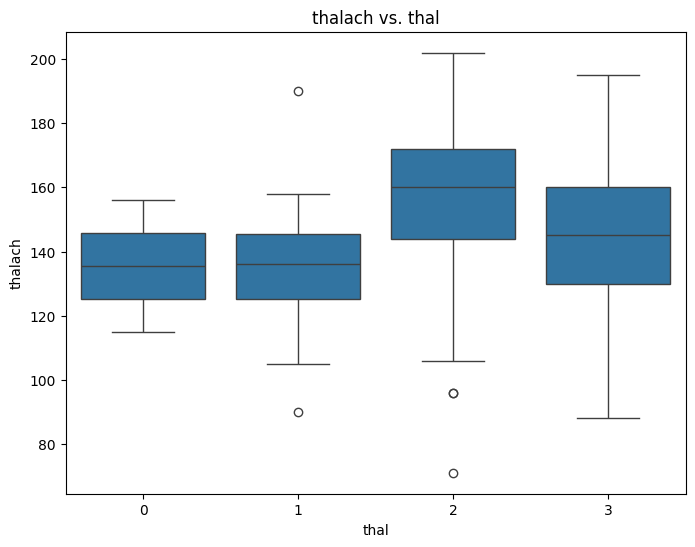

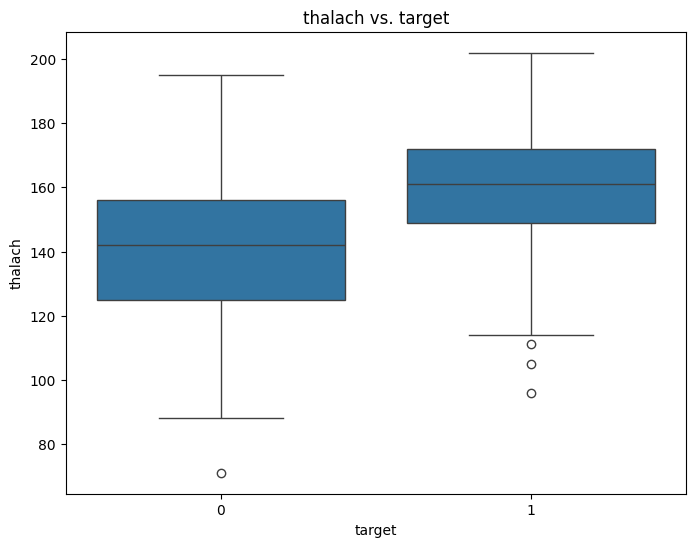

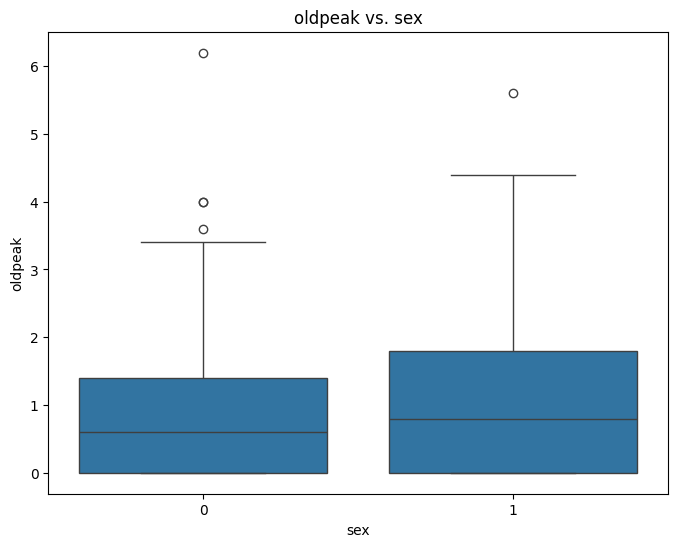

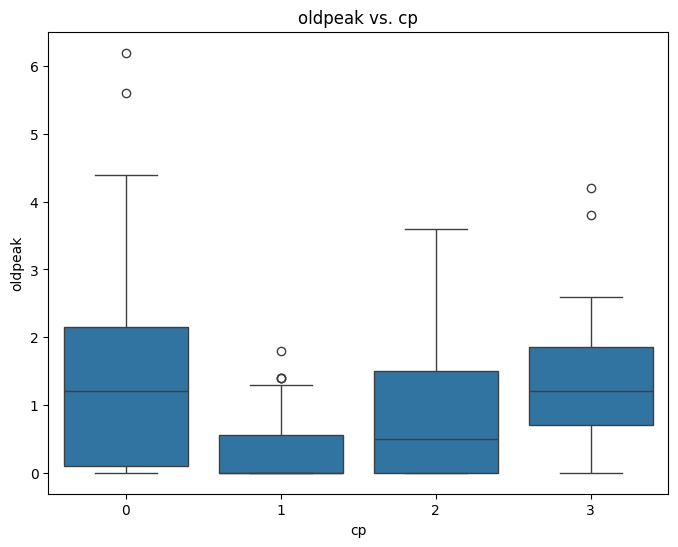

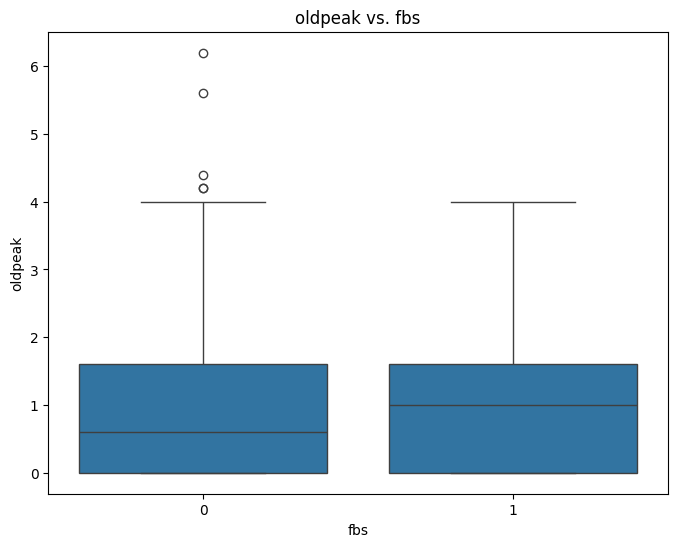

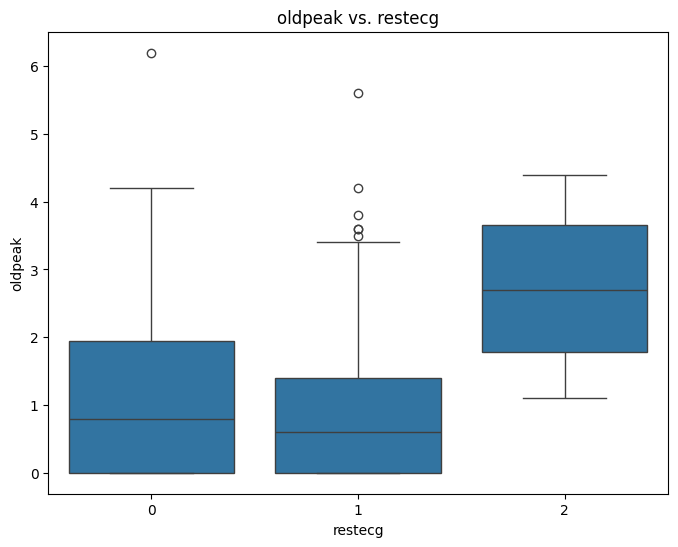

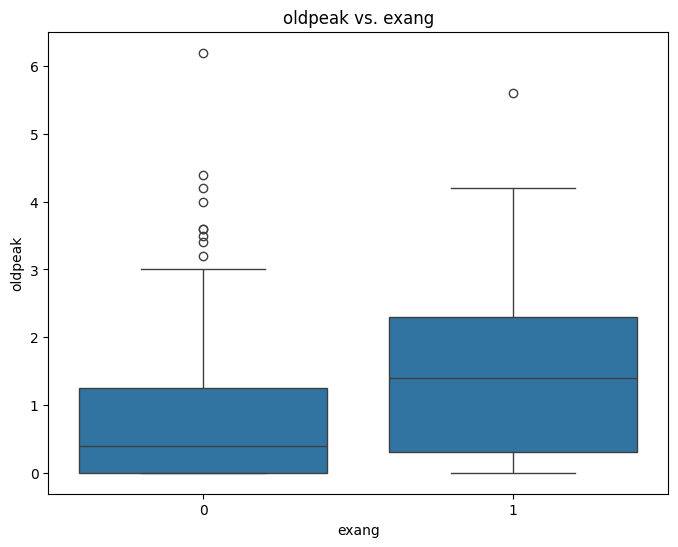

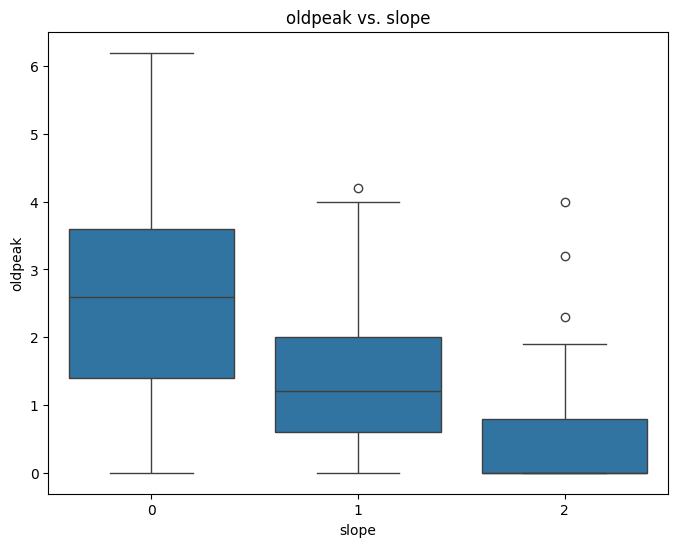

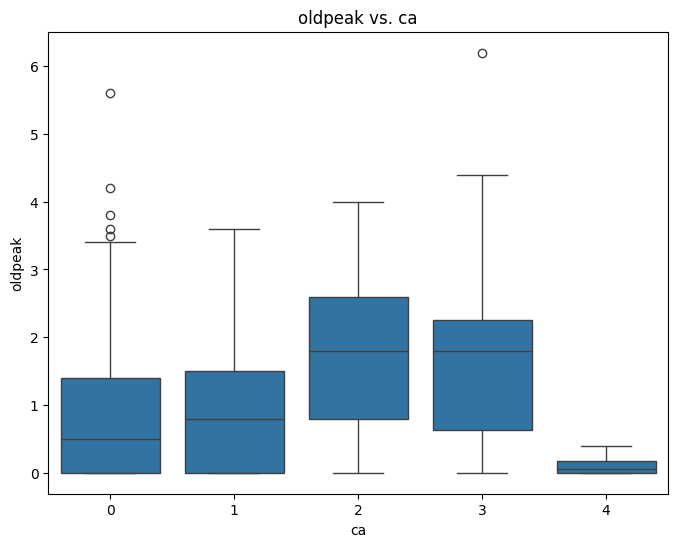

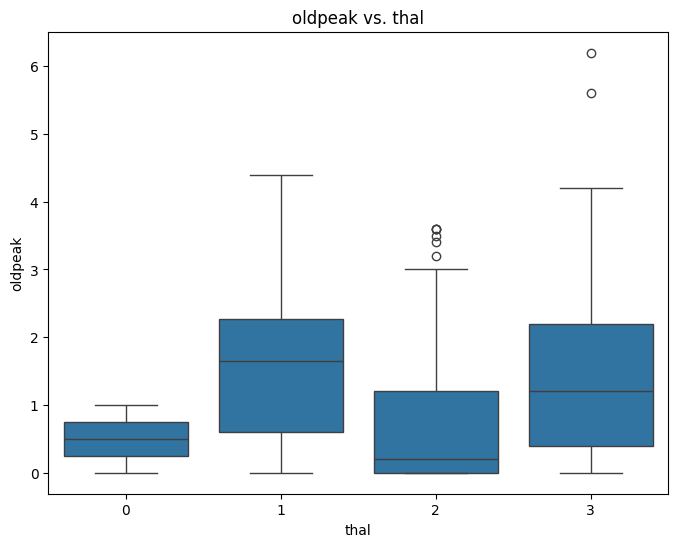

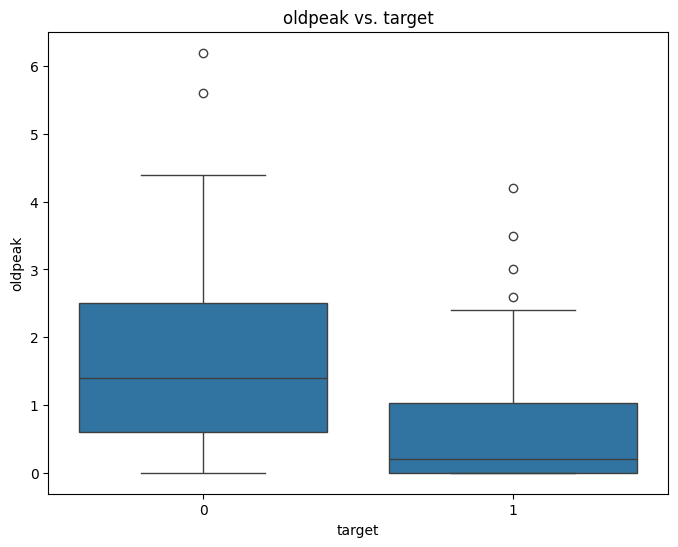

<Figure size 800x600 with 0 Axes>

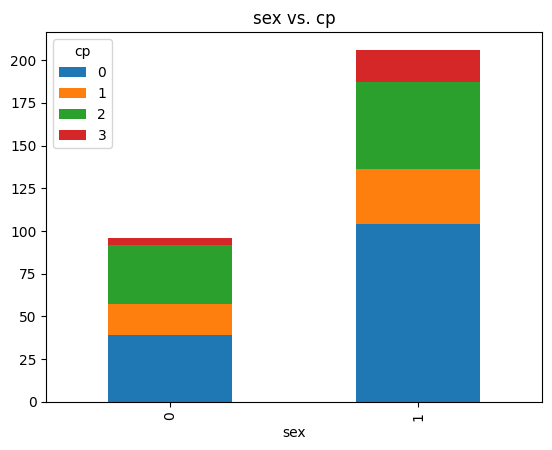

<Figure size 800x600 with 0 Axes>

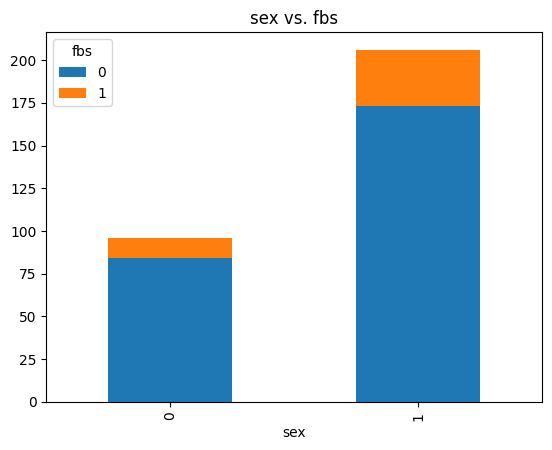

<Figure size 800x600 with 0 Axes>

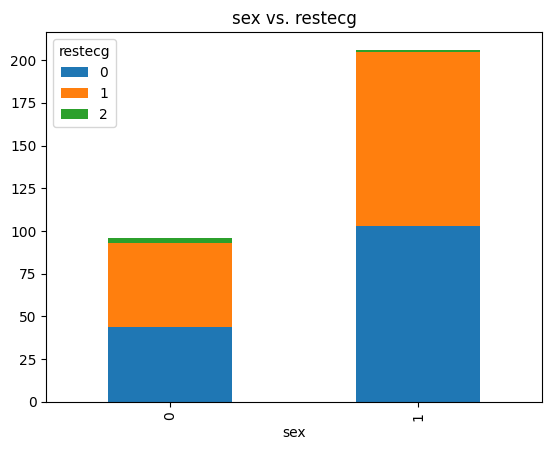

<Figure size 800x600 with 0 Axes>

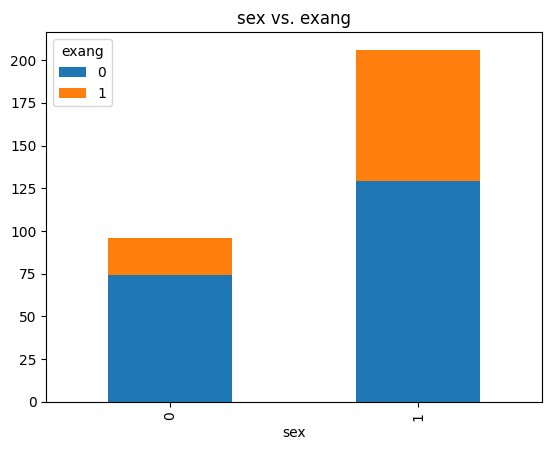

<Figure size 800x600 with 0 Axes>

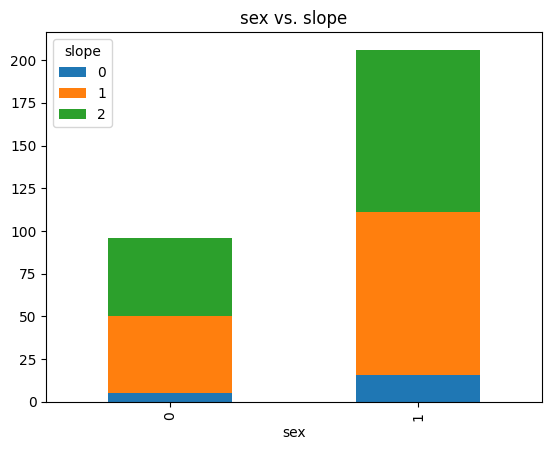

<Figure size 800x600 with 0 Axes>

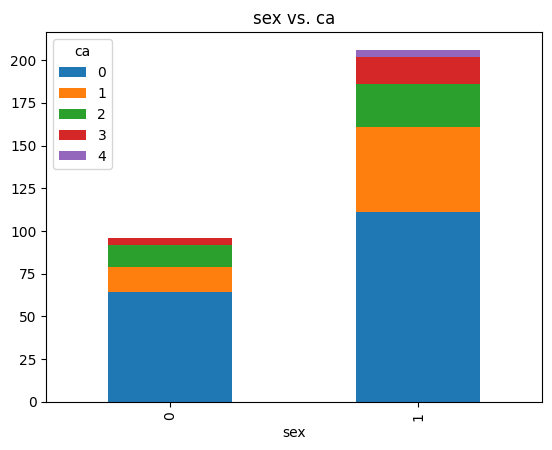

<Figure size 800x600 with 0 Axes>

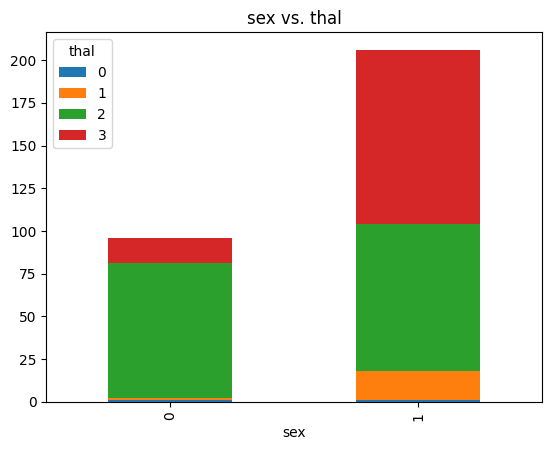

<Figure size 800x600 with 0 Axes>

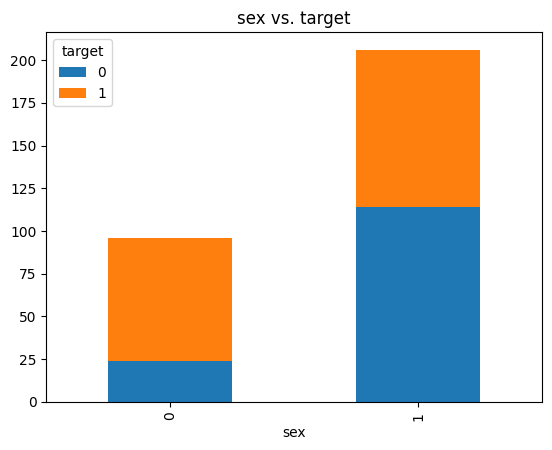

<Figure size 800x600 with 0 Axes>

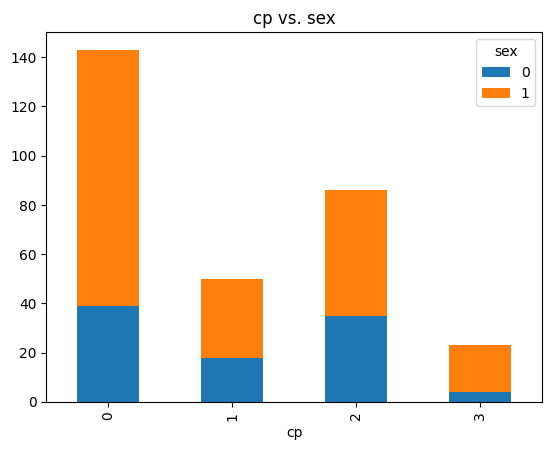

<Figure size 800x600 with 0 Axes>

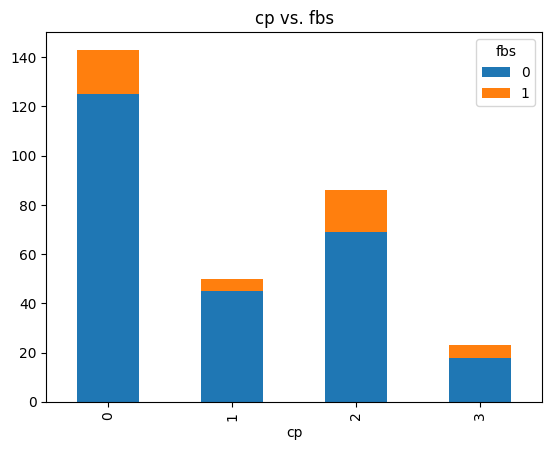

<Figure size 800x600 with 0 Axes>

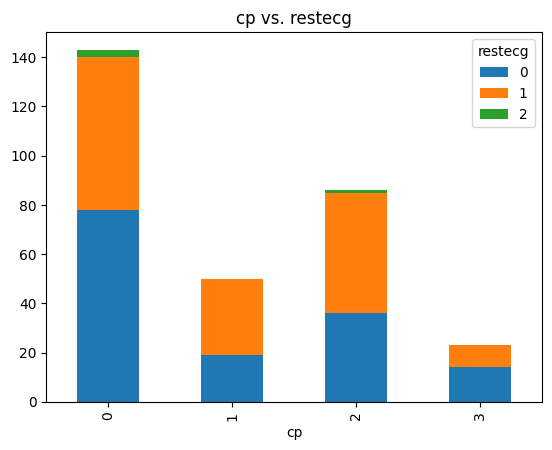

<Figure size 800x600 with 0 Axes>

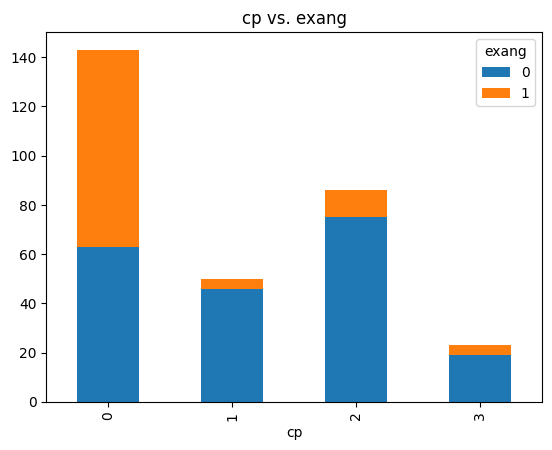

<Figure size 800x600 with 0 Axes>

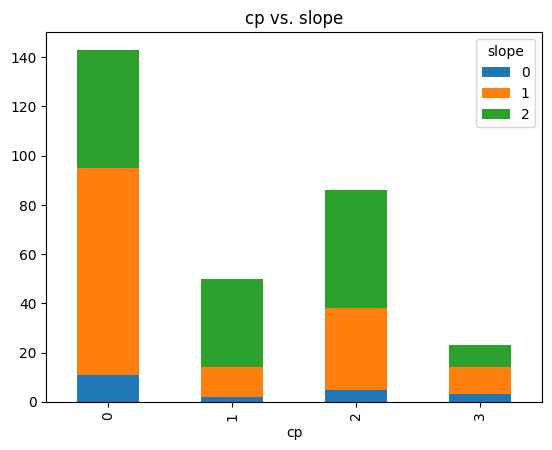

<Figure size 800x600 with 0 Axes>

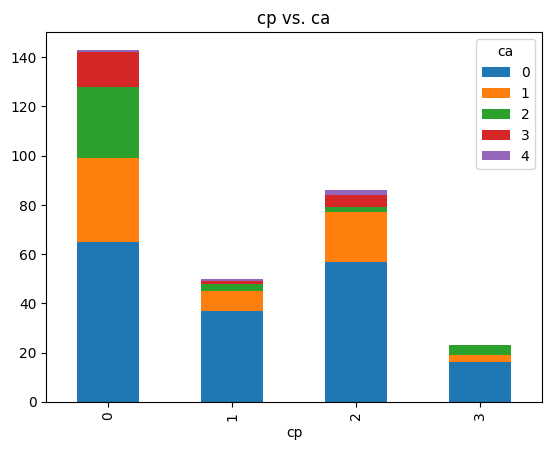

<Figure size 800x600 with 0 Axes>

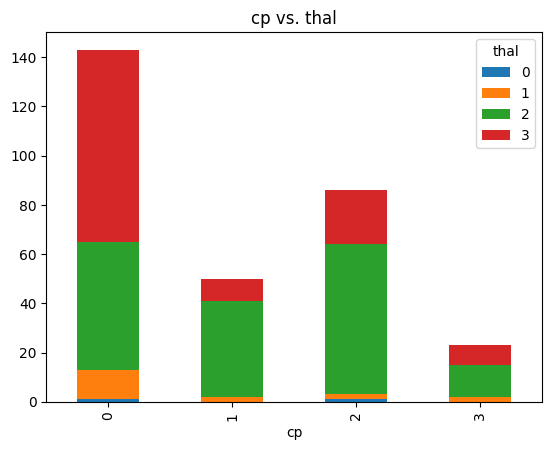

<Figure size 800x600 with 0 Axes>

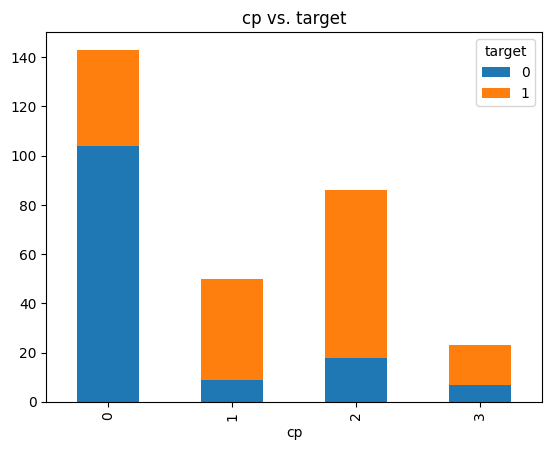

<Figure size 800x600 with 0 Axes>

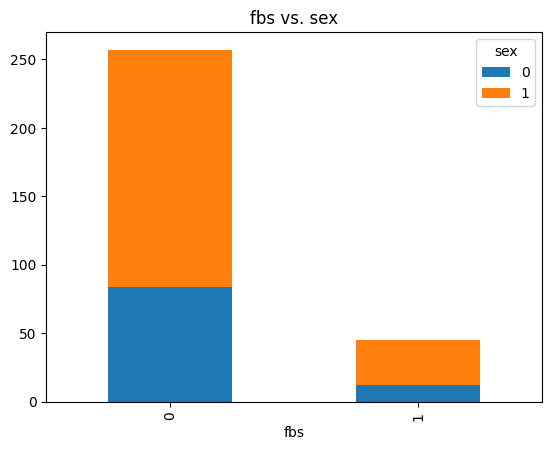

<Figure size 800x600 with 0 Axes>

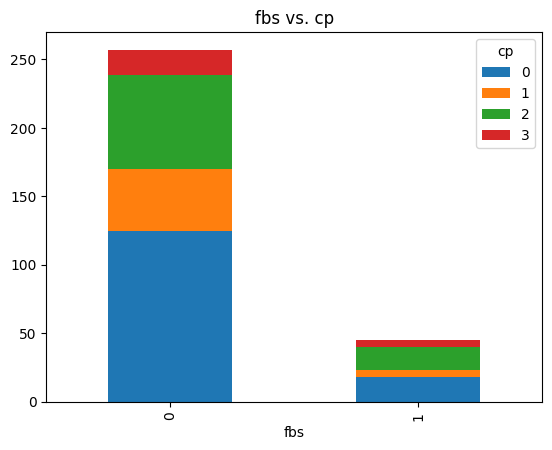

<Figure size 800x600 with 0 Axes>

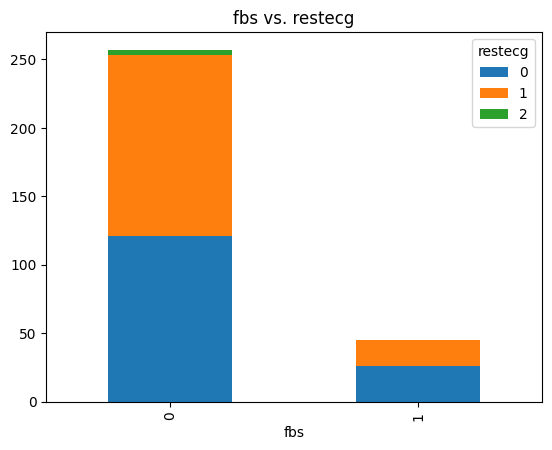

<Figure size 800x600 with 0 Axes>

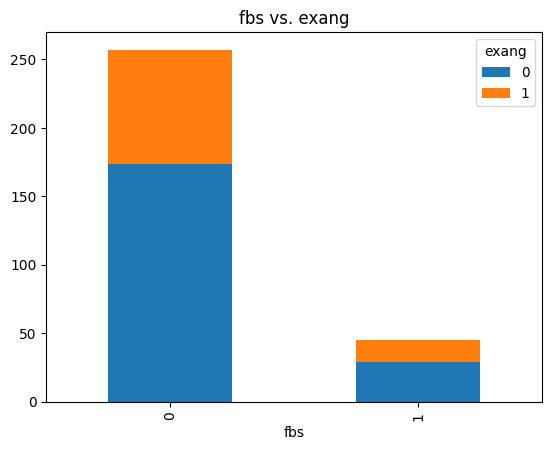

<Figure size 800x600 with 0 Axes>

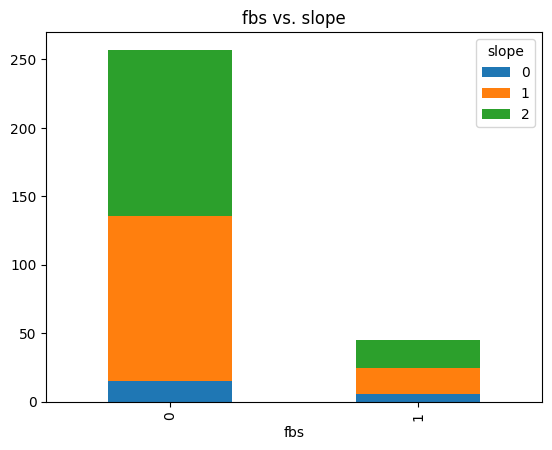

<Figure size 800x600 with 0 Axes>

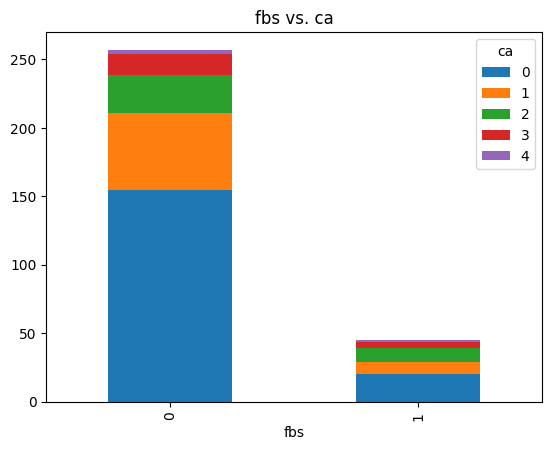

<Figure size 800x600 with 0 Axes>

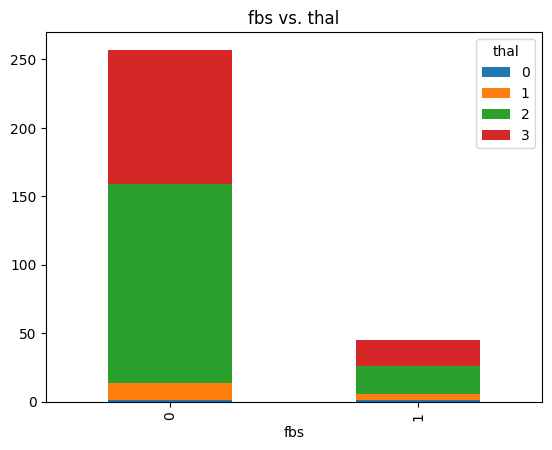

<Figure size 800x600 with 0 Axes>

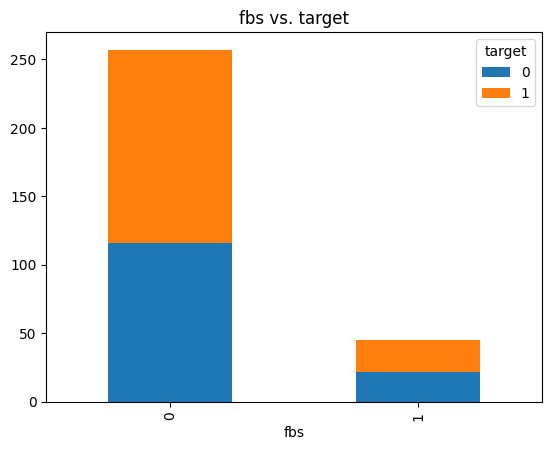

<Figure size 800x600 with 0 Axes>

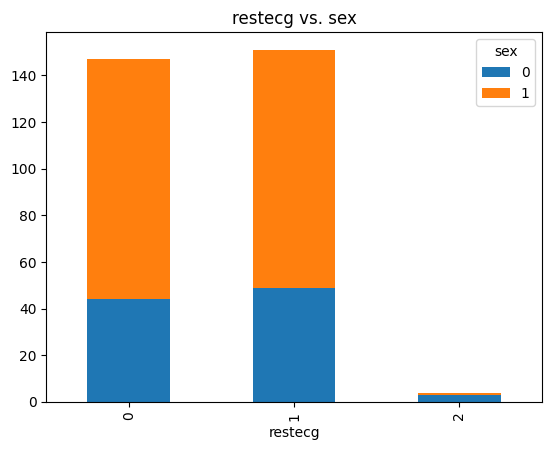

<Figure size 800x600 with 0 Axes>

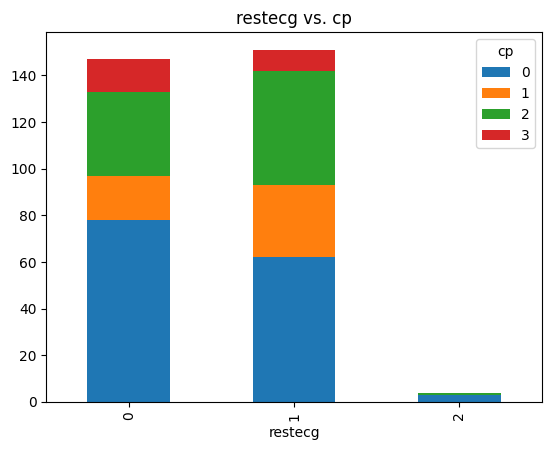

<Figure size 800x600 with 0 Axes>

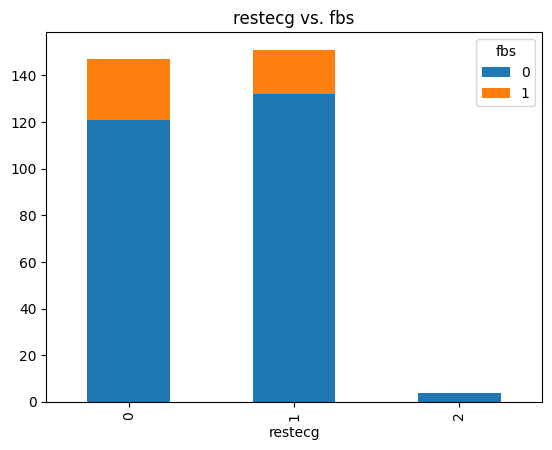

<Figure size 800x600 with 0 Axes>

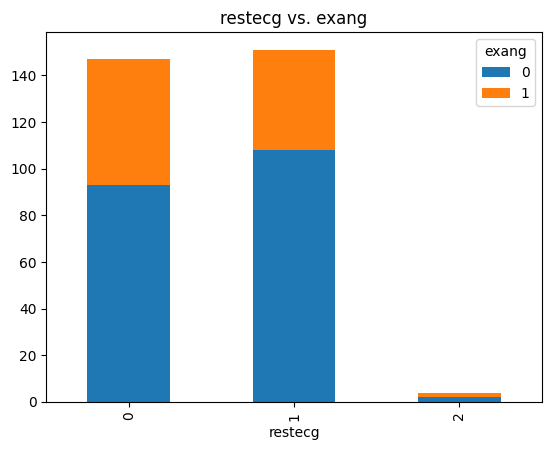

<Figure size 800x600 with 0 Axes>

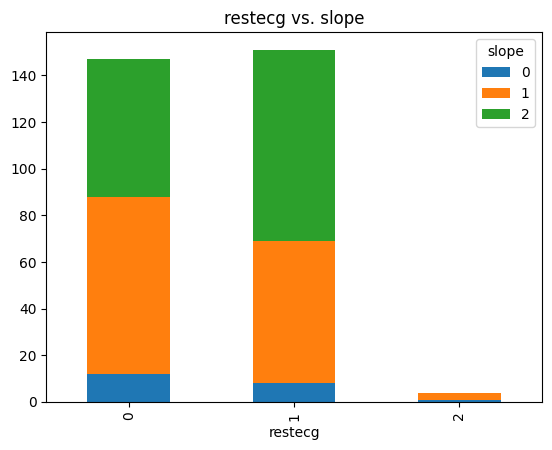

<Figure size 800x600 with 0 Axes>

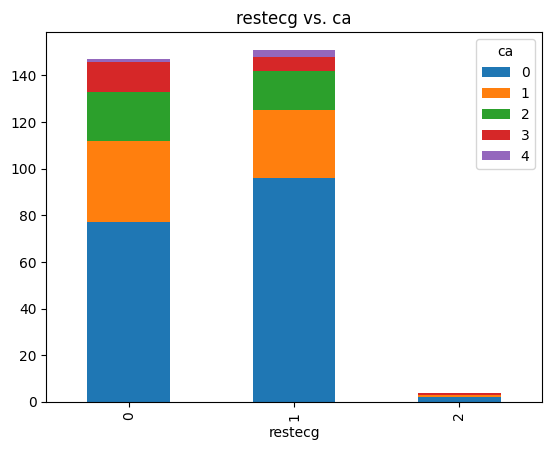

<Figure size 800x600 with 0 Axes>

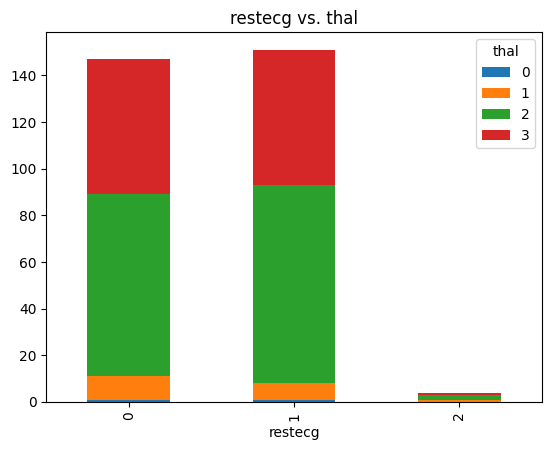

<Figure size 800x600 with 0 Axes>

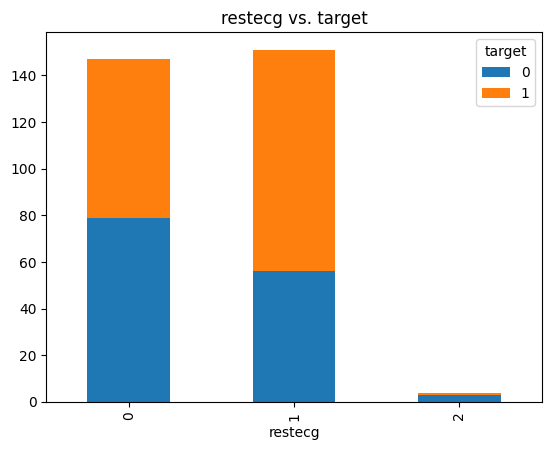

<Figure size 800x600 with 0 Axes>

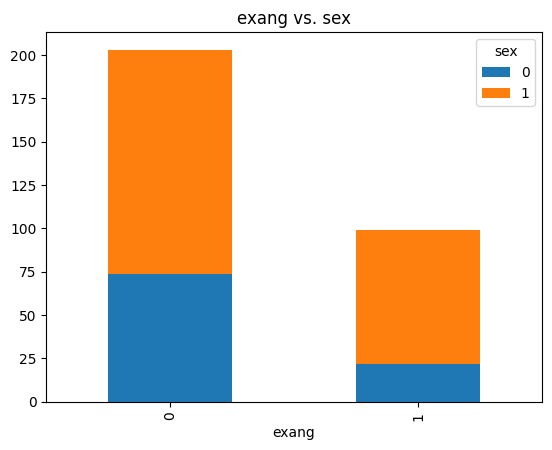

<Figure size 800x600 with 0 Axes>

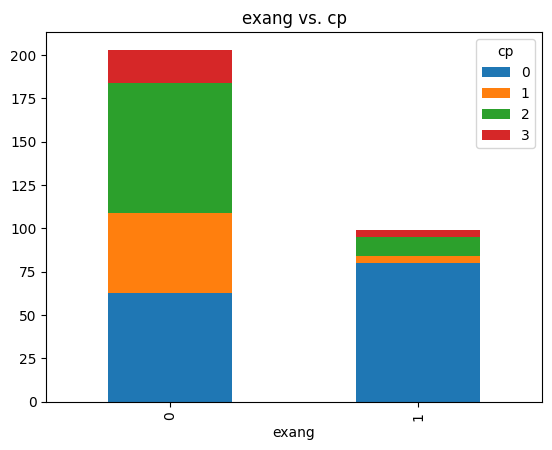

<Figure size 800x600 with 0 Axes>

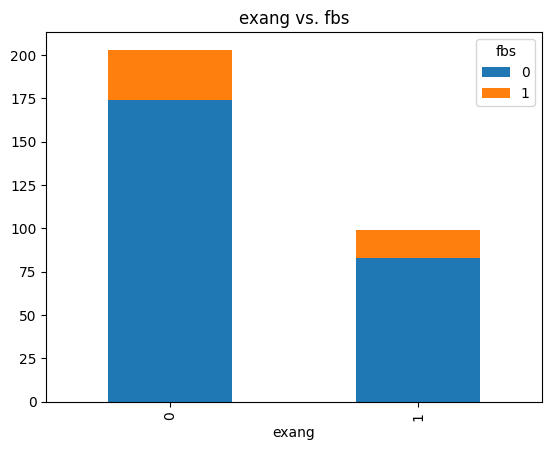

<Figure size 800x600 with 0 Axes>

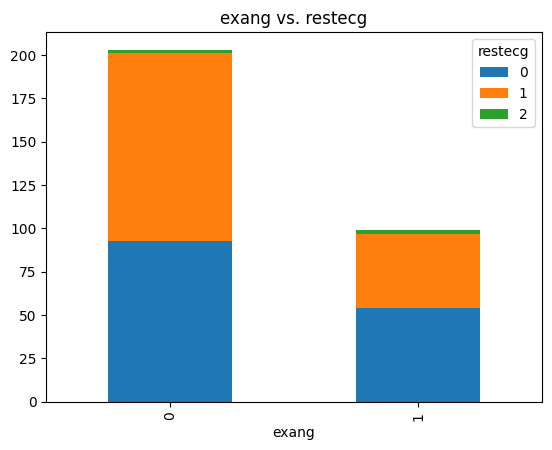

<Figure size 800x600 with 0 Axes>

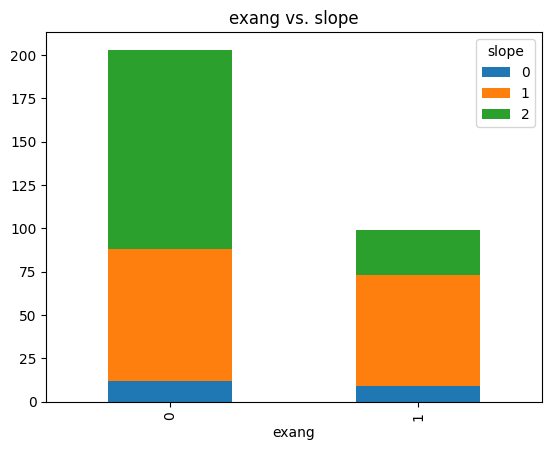

<Figure size 800x600 with 0 Axes>

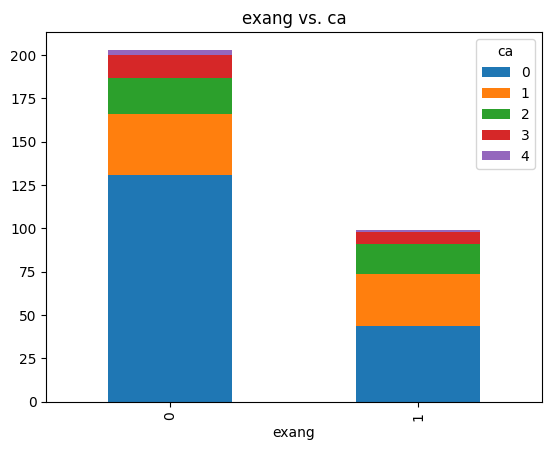

<Figure size 800x600 with 0 Axes>

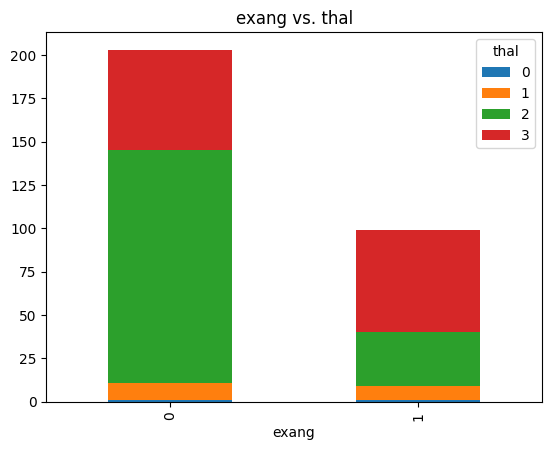

<Figure size 800x600 with 0 Axes>

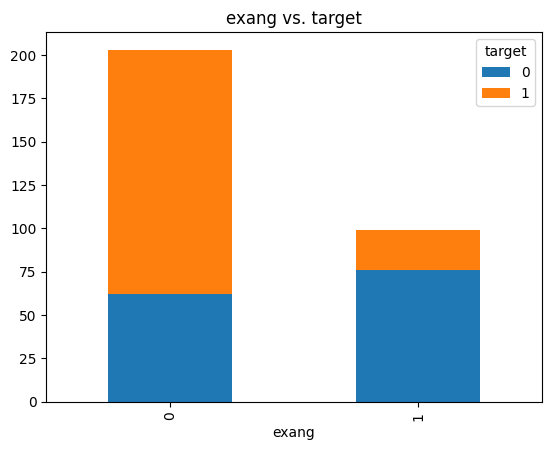

<Figure size 800x600 with 0 Axes>

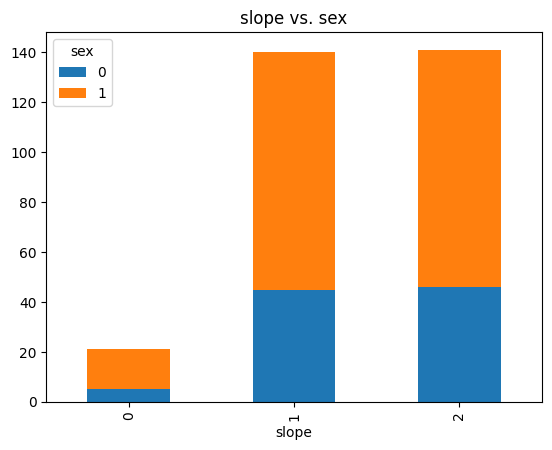

<Figure size 800x600 with 0 Axes>

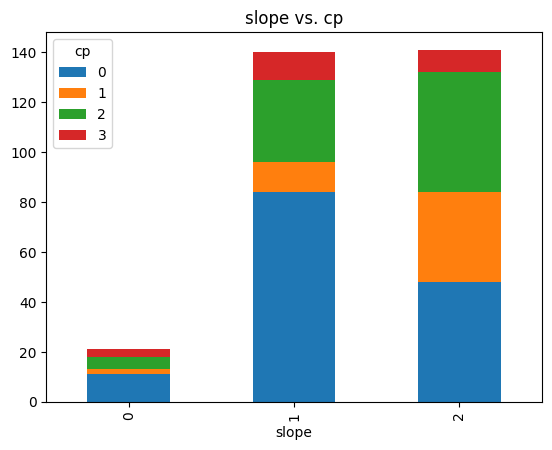

<Figure size 800x600 with 0 Axes>

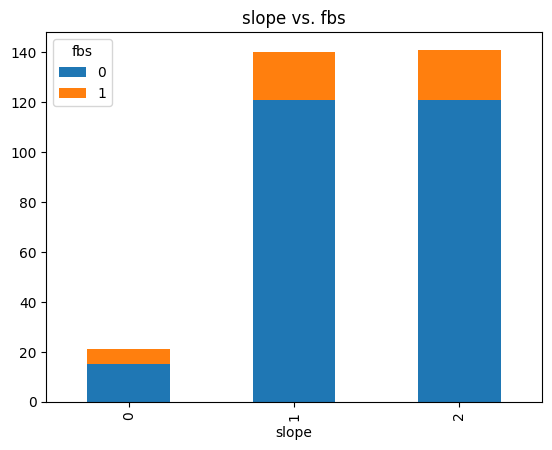

<Figure size 800x600 with 0 Axes>

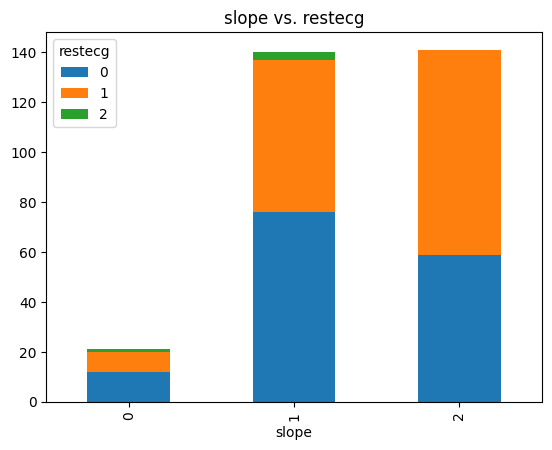

<Figure size 800x600 with 0 Axes>

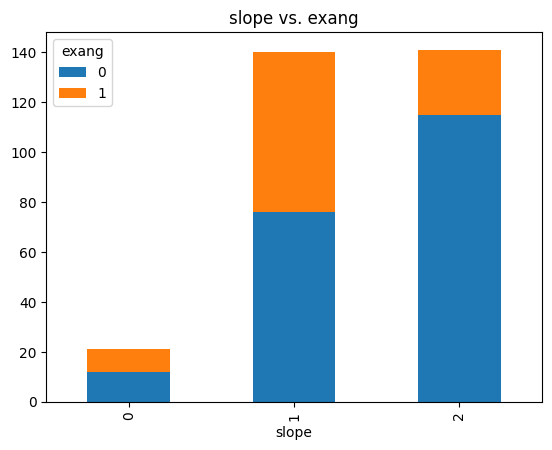

<Figure size 800x600 with 0 Axes>

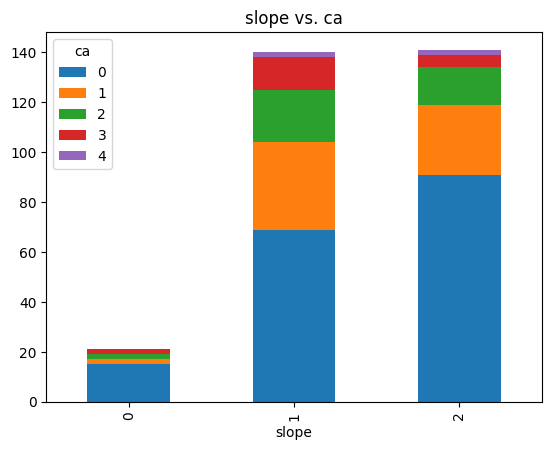

<Figure size 800x600 with 0 Axes>

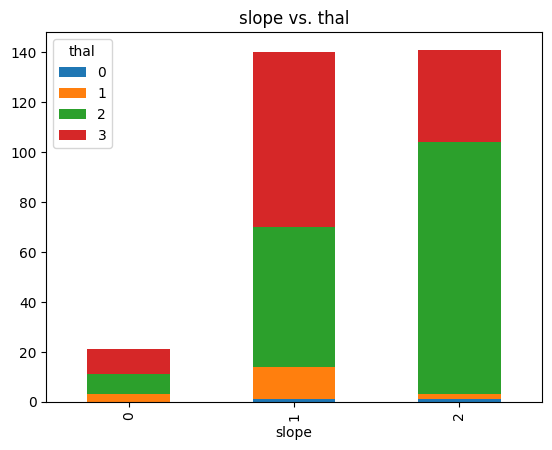

<Figure size 800x600 with 0 Axes>

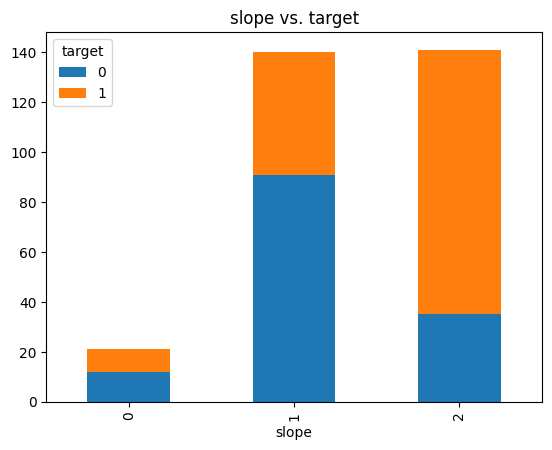

<Figure size 800x600 with 0 Axes>

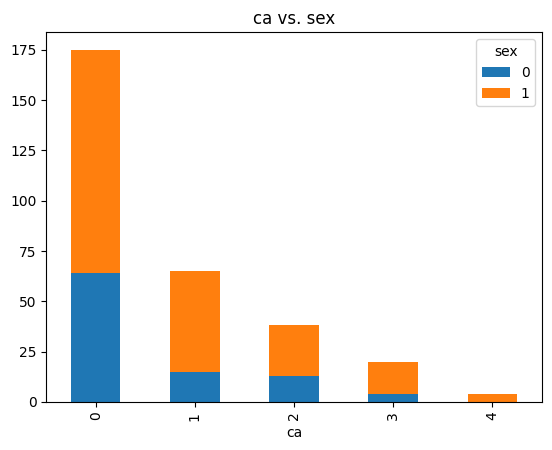

<Figure size 800x600 with 0 Axes>

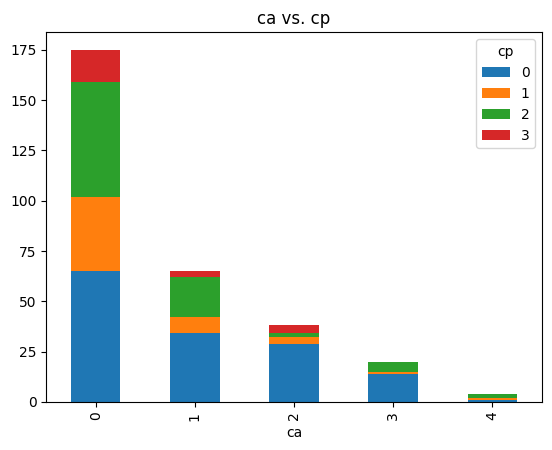

<Figure size 800x600 with 0 Axes>

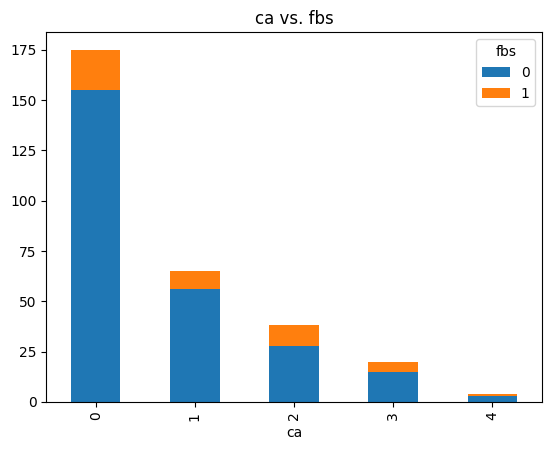

<Figure size 800x600 with 0 Axes>

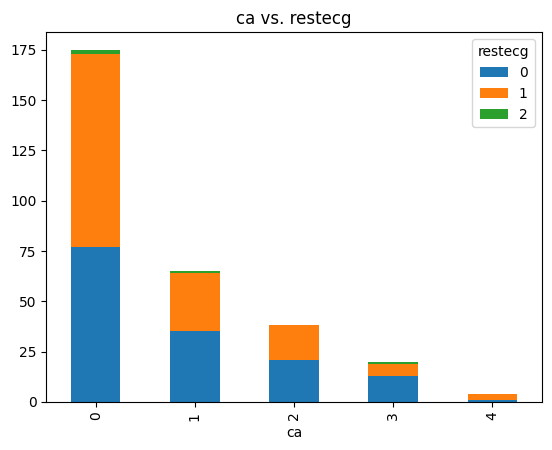

<Figure size 800x600 with 0 Axes>

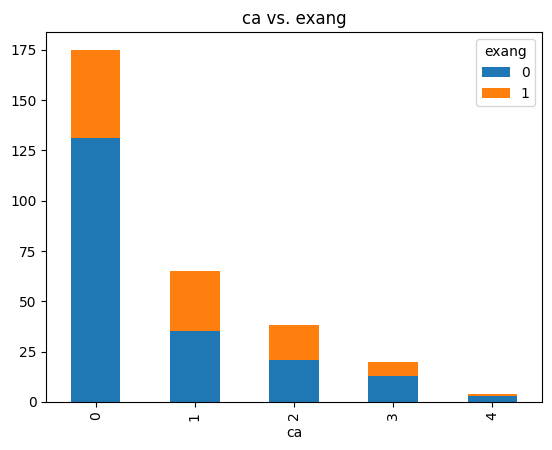

<Figure size 800x600 with 0 Axes>

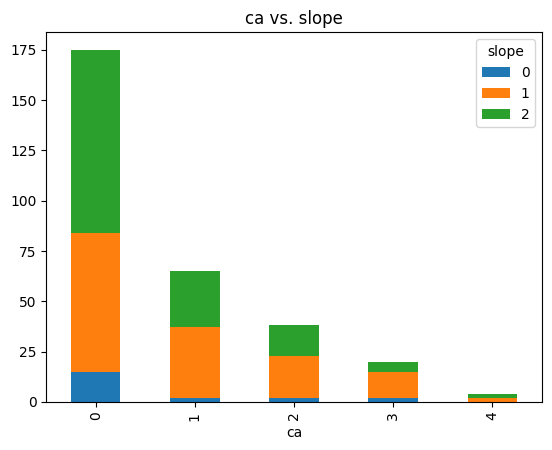

<Figure size 800x600 with 0 Axes>

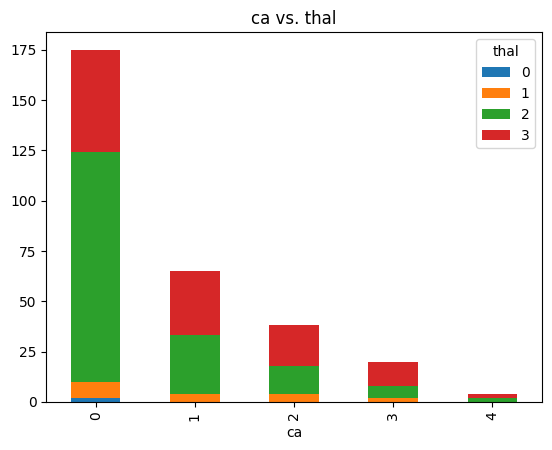

<Figure size 800x600 with 0 Axes>

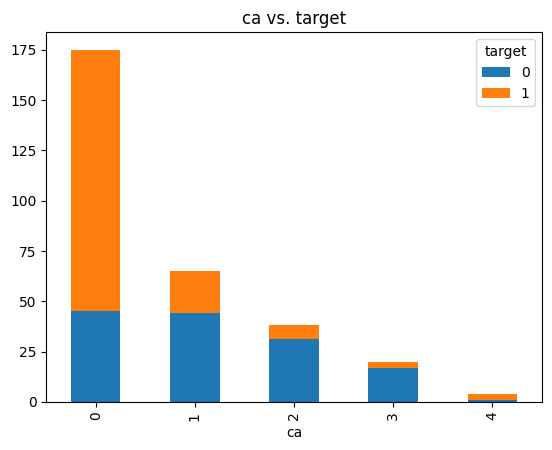

<Figure size 800x600 with 0 Axes>

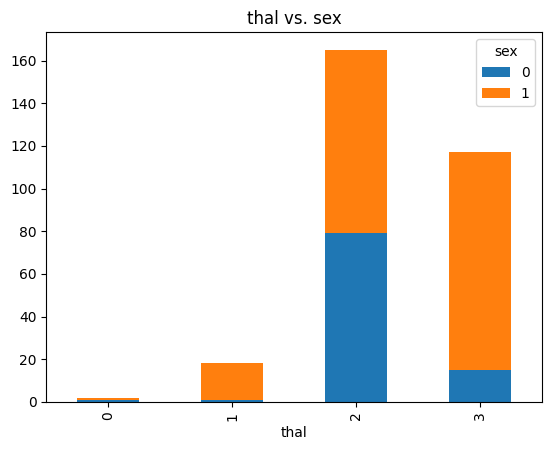

<Figure size 800x600 with 0 Axes>

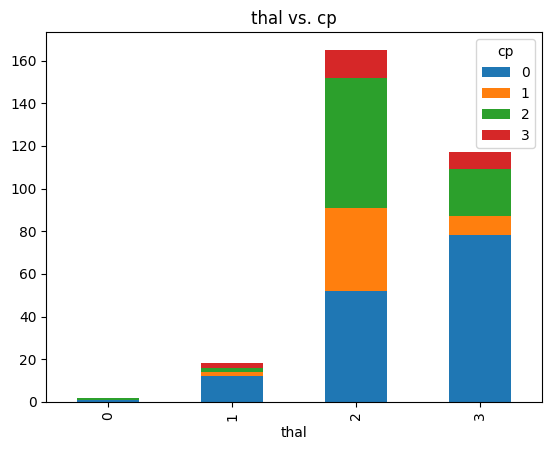

<Figure size 800x600 with 0 Axes>

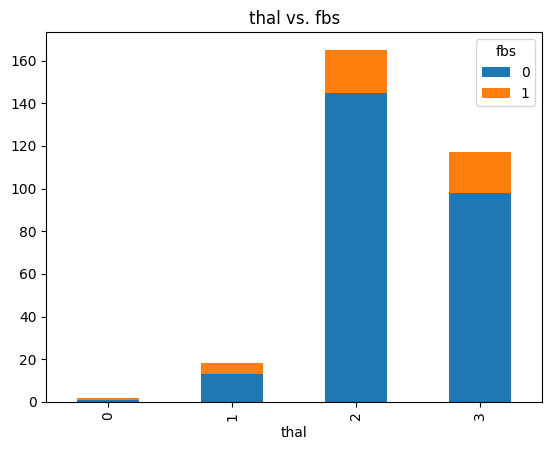

<Figure size 800x600 with 0 Axes>

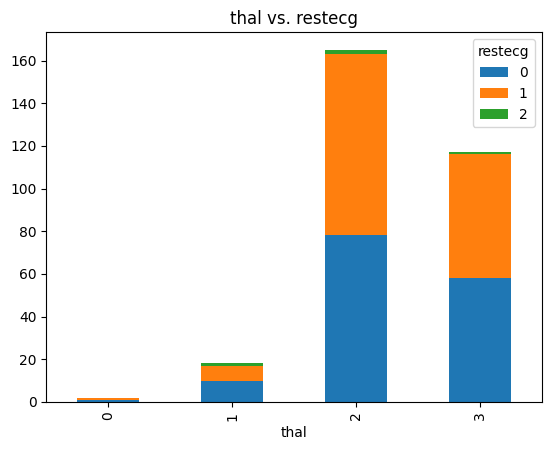

<Figure size 800x600 with 0 Axes>

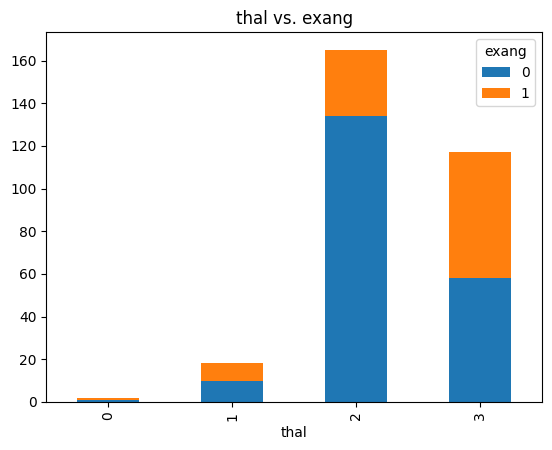

<Figure size 800x600 with 0 Axes>

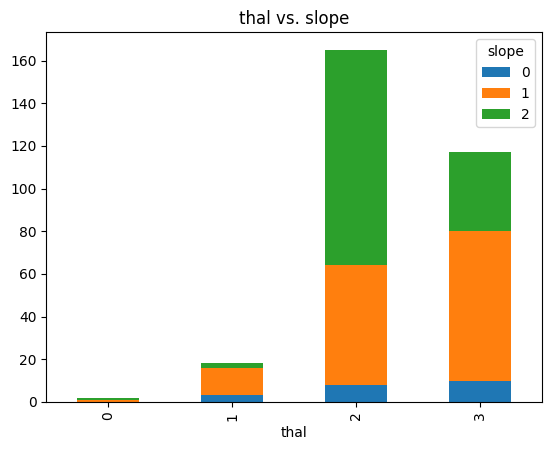

<Figure size 800x600 with 0 Axes>

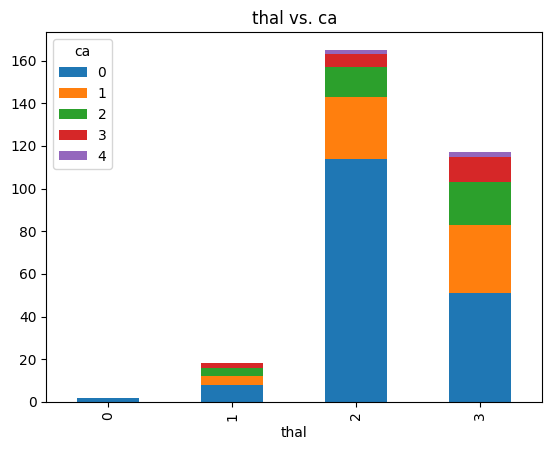

<Figure size 800x600 with 0 Axes>

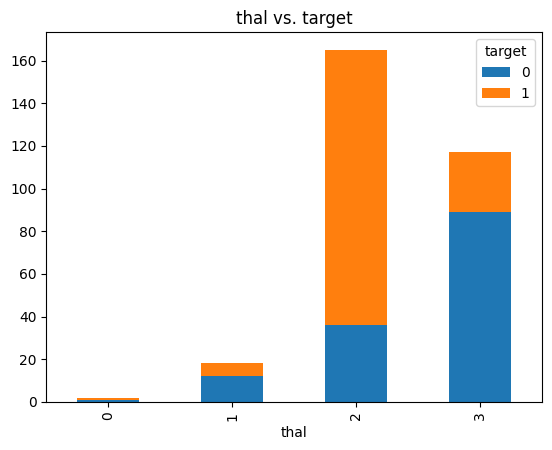

<Figure size 800x600 with 0 Axes>

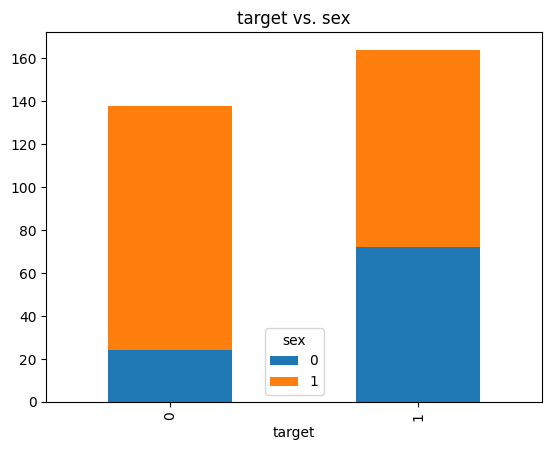

<Figure size 800x600 with 0 Axes>

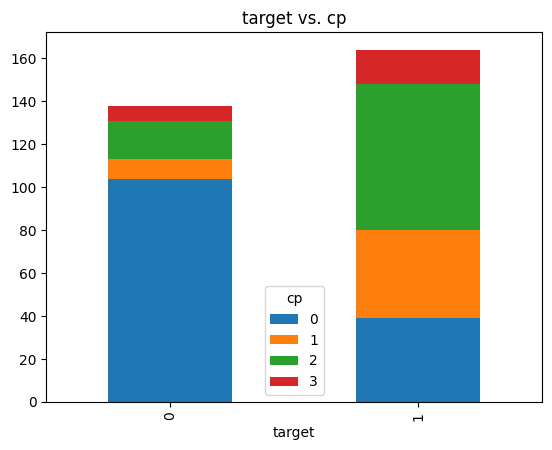

<Figure size 800x600 with 0 Axes>

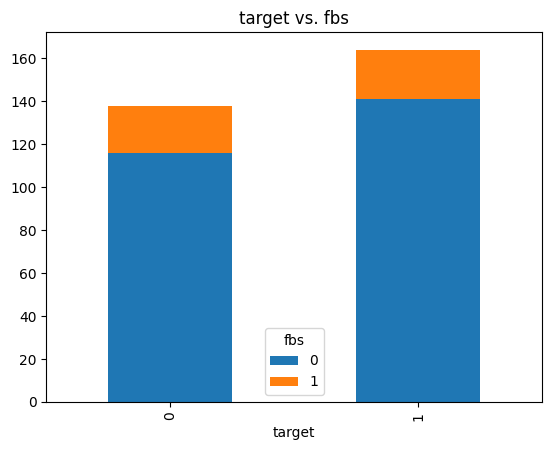

<Figure size 800x600 with 0 Axes>

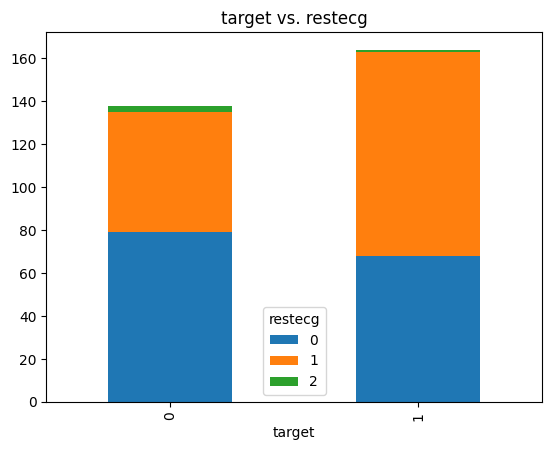

<Figure size 800x600 with 0 Axes>

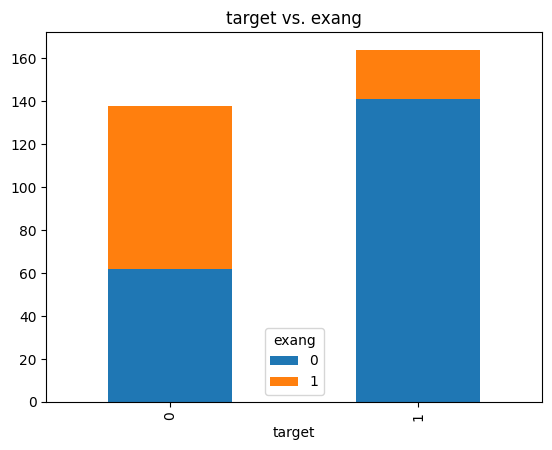

<Figure size 800x600 with 0 Axes>

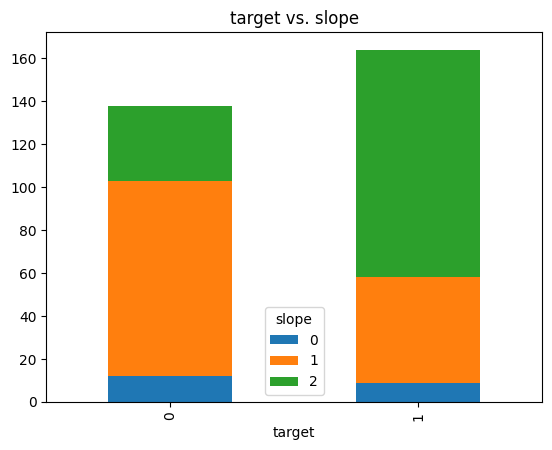

<Figure size 800x600 with 0 Axes>

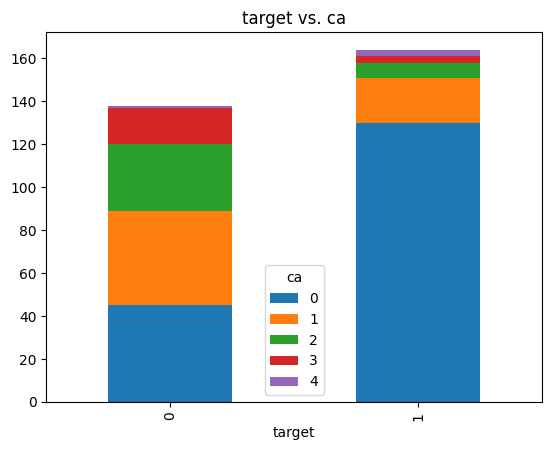

<Figure size 800x600 with 0 Axes>

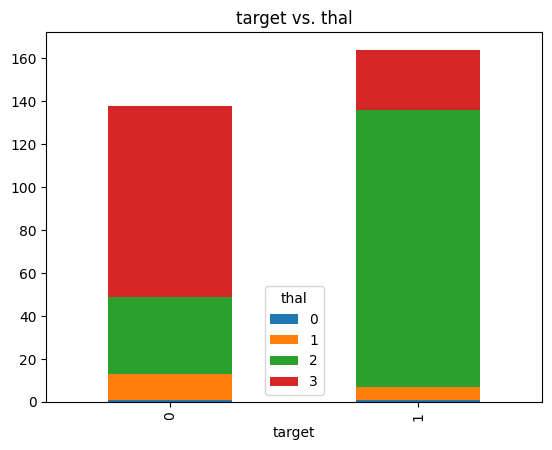

In [17]:
for col1 in numerical_features:
    for col2 in numerical_features:
        if col1 != col2:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=df[col1],y=df[col2],hue=df['target'])
            plt.title(f'{col1} vs. {col2}')
            plt.show()

for col1 in numerical_features:
    for col2 in categorical_features:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=df[col2],y=df[col1])
        plt.title(f'{col1} vs. {col2}')
        plt.show()

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1!=col2:
            plt.figure(figsize=(8,6))
            pd.crosstab(df[col1],df[col2]).plot(kind='bar',stacked=True)
            plt.title(f'{col1} vs. {col2}')
            plt.show()                    

It shows pairwise visualizations to explore relationships: scatter plots between numerical features by target, box plots between numerical and categorical features, and stacked bar charts between categorical features.

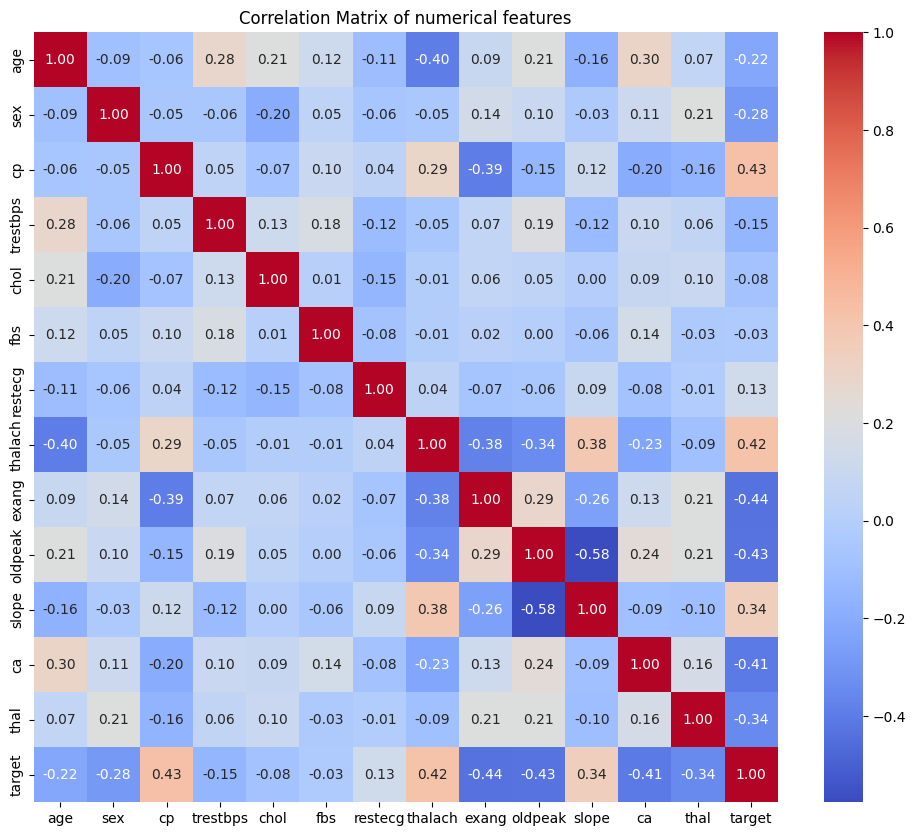

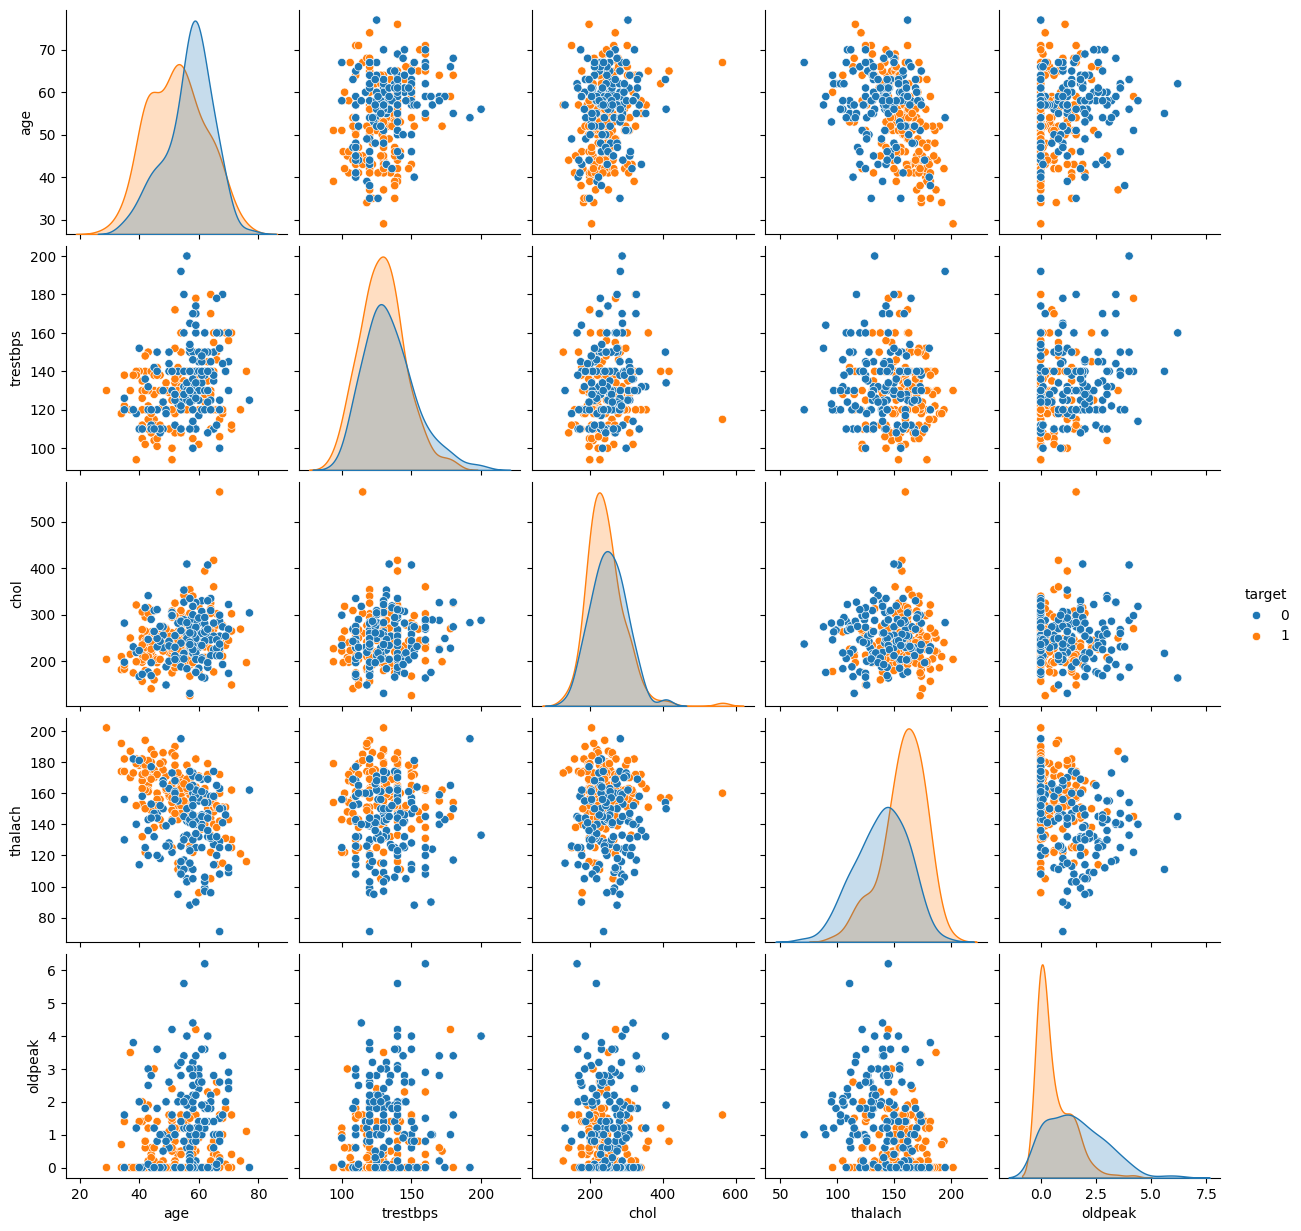

In [18]:
plt.figure(figsize=(12,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of numerical features')
plt.show()

sns.pairplot(df,hue='target',vars=numerical_features)
plt.show()

The heatmap shows the strength and direction of correlation between numerical features.It shows that cp, thalach, and slope have strong positive correlations with target, while exang, oldpeak, ca, and thal are negatively correlated, indicating they are key predictors for heart disease.
It visualizes pairwise distributions and class separation, helping detect clusters or patterns useful for classification.It shows that patients with heart disease (target=1) tend to have higher thalach (maximum heart rate) and lower oldpeak (ST depression), compared to those without.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13492\3420174060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='female')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13492\3420174060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],labe

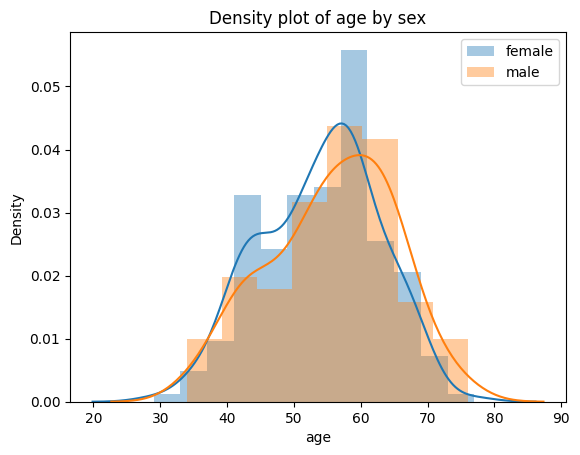

In [19]:
sns.distplot(df[df['sex']==1]['age'],label='female')
sns.distplot(df[df['sex']==0]['age'],label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

It shows that both males and females have a similar age distribution centered around 55–60 years.However, females show a slightly sharper peak, indicating a more concentrated age group compared to the broader spread among males.

Text(0.5, 1.0, 'Resting blood pressure distribution')

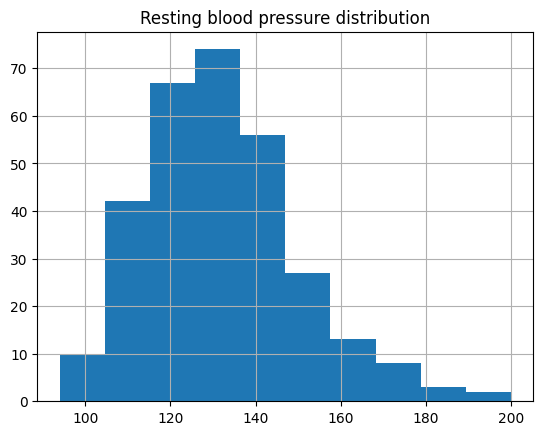

In [20]:
df['trestbps'].hist()
plt.title('Resting blood pressure distribution')

The histogram of resting blood pressure (trestbps) shows a roughly normal distribution centered around 130 mm Hg. Most values fall between 110 and 150 mm Hg

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13492\3620823048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'],bins=10)


Text(0.5, 1.0, 'Resting blood pressure destiny plot')

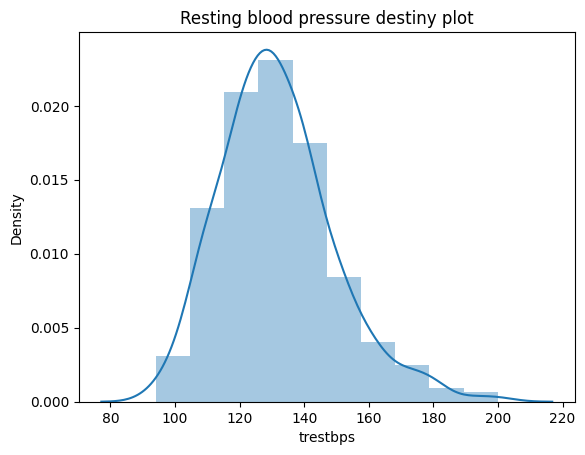

In [21]:
sns.distplot(df['trestbps'],bins=10)
plt.title('Resting blood pressure destiny plot')

The density plot of trestbps indicates a slightly right-skewed distribution with most patients having resting blood pressure between 110 and 140 mm Hg.

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

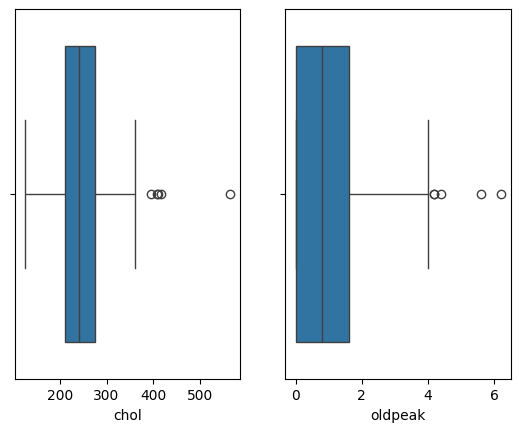

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='chol',data=df,orient='v',ax=axes[0])
sns.boxplot(x='oldpeak',data=df,orient='v',ax=axes[1])

The boxplots show that chol has several outliers on the higher end, indicating some patients with unusually high cholesterol levels. Oldpeak also has mild outliers but is more symmetrically distributed, with most values clustered at the lower end.

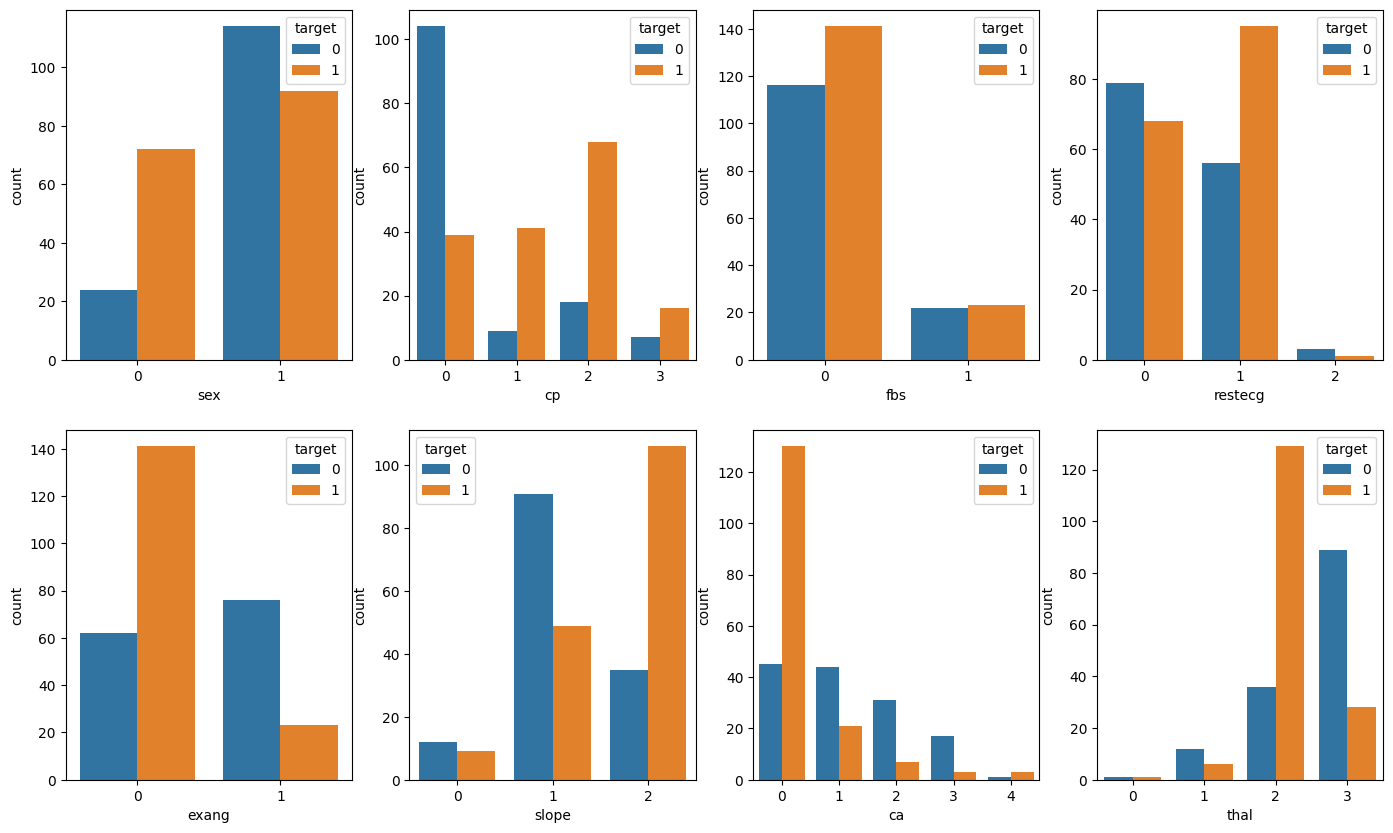

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

It show that certain categorical features like cp (chest pain type) and exang (exercise-induced angina) display clear differences between data.The features like fbs (fasting blood sugar) and restecg (resting ECG) show relatively uniform distributions across target classes, implying weaker influence on heart disease prediction.

Text(0.5, 1.0, 'Count of target feature by sex')

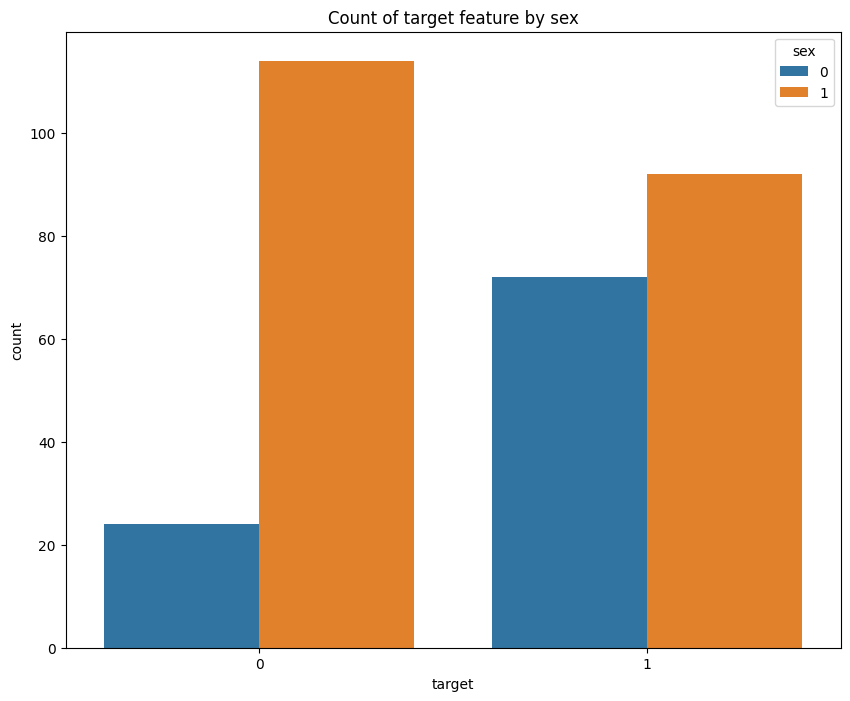

In [24]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

It shows more females (sex = 0) have a positive heart disease diagnosis (target = 1) compared to males.Comparativley,males (sex = 1) are more represented in the group without heart disease (target = 0).

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

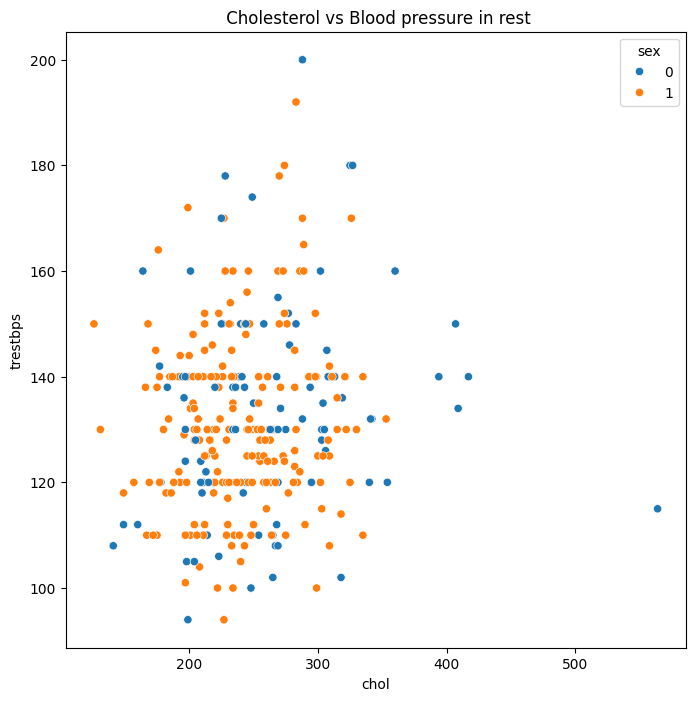

In [25]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

It shows no strong linear relationship between cholesterol and resting blood pressure, indicating these features vary independently.

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

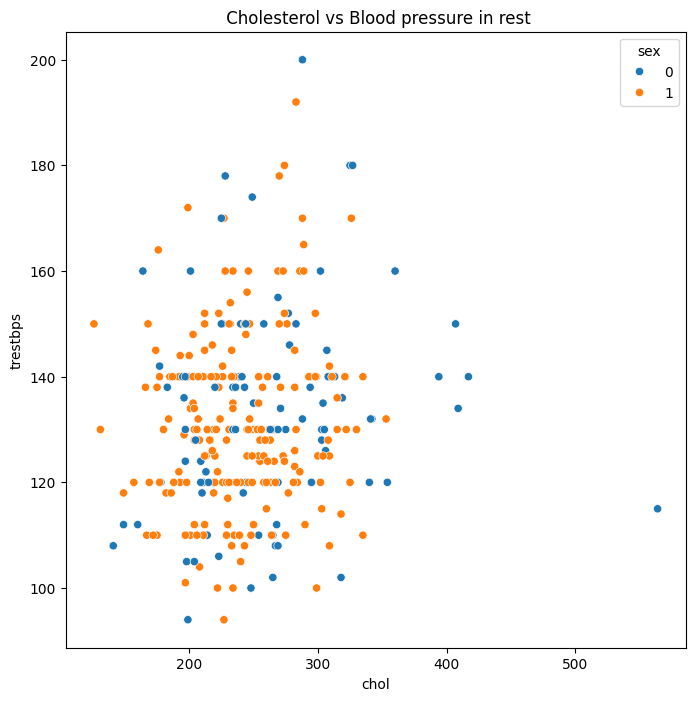

In [26]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

It shows a weak or no clear correlation between cholesterol and resting blood pressure values across individuals.

In [27]:
# 1. Create a new feature: 'age_group'
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-39', '40-49', '50-59', '60-69', '70+'])


# 2. Create interaction features:  'chol_trestbps'
df['chol_trestbps'] = df['chol'] * df['trestbps']


# 3. Create a new feature: 'heart_rate_relative_to_age'
df['heart_rate_relative_to_age'] = df['thalach'] / df['age']

# 4. Create a BMI feature (assuming we have weight and height data -  replace with your actual columns)
# df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2)  # replace with actual columns
# Handle potential issues like zero height or missing data

# Example of creating a binary feature based on a threshold
df['high_cholesterol'] = (df['chol'] > 240).astype(int)


# 5. One-hot encoding for categorical features with more than two categories:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
#6. Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])



# Display the updated DataFrame with the engineered features
print(df.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   63    1       145   233    1      150      0      2.3   0       1  ...   
1   37    1       130   250    0      187      0      3.5   0       1  ...   
2   41    0       130   204    0      172      0      1.4   0       1  ...   
3   56    1       120   236    0      178      0      0.8   0       1  ...   
4   57    0       120   354    0      163      1      0.6   0       1  ...   

    cp_1   cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  \
0  False  False   True      False      False    False    False    True   
1  False   True  False       True      False    False    False   False   
2   True  False  False      False      False    False     True   False   
3   True  False  False       True      False    False     True   False   
4  False  False  False       True      False    False     True   False   

   thal_2  thal_3  
0   False   False  
1    True   False  
2    True   False  
3    T

The features like age groups, interaction terms (chol_trestbps), and normalized heart rate (heart_rate_relative_to_age) enhance the dataset's ability to capture complex relationships.one-hot and label encoding converts categorical columns to numerical data.

In [28]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Assuming X (features) and y (target) are defined
X = df.drop('target', axis=1)
y = df['target']

# Method 1: SelectKBest with chi2 (for non-negative features)
# Select the top 10 features
selector_chi2 = SelectKBest(chi2, k=10)
X_new_chi2 = selector_chi2.fit_transform(X, y)

# Get the indices of the selected features
selected_indices_chi2 = selector_chi2.get_support(indices=True)
selected_features_chi2 = X.columns[selected_indices_chi2]

print("Selected features using chi2:", selected_features_chi2)


# Method 2: SelectKBest with ANOVA F-value (for both numerical and categorical features)
selector_f_classif = SelectKBest(f_classif, k=10)
X_new_f_classif = selector_f_classif.fit_transform(X,y)

selected_indices_f_classif = selector_f_classif.get_support(indices = True)
selected_features_f_classif = list(X.columns[selected_indices_f_classif])

print("Selected features using ANOVA F-value:", selected_features_f_classif)

Selected features using chi2: Index(['age', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'chol_trestbps',
       'slope_2', 'thal_2', 'thal_3'],
      dtype='object')
Selected features using ANOVA F-value: ['thalach', 'exang', 'oldpeak', 'ca', 'heart_rate_relative_to_age', 'cp_2', 'slope_1', 'slope_2', 'thal_2', 'thal_3']


The SelectKBest feature selection method identifies the top 10 most relevant features based on statistical tests: chi2 selects features with strong non-negative correlation to the target, while f_classif uses ANOVA F-values suitable for numerical data. This helps reduce dimensionality and improve model performance by focusing on the most informative variables.

In [29]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Assuming X (features) and y (target) are defined
X = df.drop('target', axis=1)
y = df['target']

# Method 1: SelectKBest with chi2 (for non-negative features)
# Select the top 10 features
selector_chi2 = SelectKBest(chi2, k=10)
X_new_chi2 = selector_chi2.fit_transform(X, y)

# Get the indices of the selected features
selected_indices_chi2 = selector_chi2.get_support(indices=True)
selected_features_chi2 = X.columns[selected_indices_chi2]

print("Selected features using chi2:", selected_features_chi2)

Selected features using chi2: Index(['age', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'chol_trestbps',
       'slope_2', 'thal_2', 'thal_3'],
      dtype='object')


In [30]:
df

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0     63    1       145   233    1      150      0      2.3   0       1  ...   
1     37    1       130   250    0      187      0      3.5   0       1  ...   
2     41    0       130   204    0      172      0      1.4   0       1  ...   
3     56    1       120   236    0      178      0      0.8   0       1  ...   
4     57    0       120   354    0      163      1      0.6   0       1  ...   
..   ...  ...       ...   ...  ...      ...    ...      ...  ..     ...  ...   
298   57    0       140   241    0      123      1      0.2   0       0  ...   
299   45    1       110   264    0      132      0      1.2   0       0  ...   
300   68    1       144   193    1      141      0      3.4   2       0  ...   
301   57    1       130   131    0      115      1      1.2   1       0  ...   
302   57    0       130   236    0      174      0      0.0   1       0  ...   

      cp_1   cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  \
0    False  False   True      False      False    False    False    True   
1    False   True  False       True      False    False    False   False   
2     True  False  False      False      False    False     True   False   
3     True  False  False       True      False    False     True   False   
4    False  False  False       True      False    False     True   False   
..     ...    ...    ...        ...        ...      ...      ...     ...   
298  False  False  False       True      False     True    False   False   
299  False  False   True       True      False     True    False   False   
300  False  False  False       True      False     True    False   False   
301  False  False  False       True      False     True    False   False   
302   True  False  False      False      False     True    False   False   

     thal_2  thal_3  
0     False   False  
1      True   False  
2      True   False  
3      True   False  
4      True   False  
..      ...     ...  
298   False    True  
299   False    True  
300   False    True  
301   False    True  
302    True   False  

[302 rows x 24 columns]

The SelectKBest method with the chi2 test identifies the top 10 features that have the strongest non-negative relationship with the target variable. This helps in selecting the most statistically significant features for classification tasks with categorical targets.

In [31]:
X = df.loc[:,['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']]#independent variable
y = df['target']#dependnet or target value
print(X.shape)
print(y.shape)

(302, 8)
(302,)


The X variable stores 10 selected independent features from the dataset, while y contains the corresponding target values (target column). We have 302 rows and 8 columns in the X and 302 rows and 0 column in the y

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(211, 8)
(91, 8)


We are spilt the data into train and test set. We will use train dataset to train the data,test dataset to evaluate the model.We also find the shape of train,test dataset.We have 211 rows and 8 columns in x_train dataset,91 rows and 8 columns in x_test dataset.

Accuracy: 0.7252747252747253
Accuracy_XTrain: 1.0
Confusion Matrix:
 [[31 14]
 [11 35]]


[Text(0.56125, 0.9615384615384616, 'ca <= 0.5\ngini = 0.493\nsamples = 211\nvalue = [93, 118]\nclass = 1'),
 Text(0.3475, 0.8846153846153846, 'oldpeak <= 1.55\ngini = 0.365\nsamples = 125\nvalue = [30, 95]\nclass = 1'),
 Text(0.195, 0.8076923076923077, 'thalach <= 145.5\ngini = 0.257\nsamples = 99\nvalue = [15, 84]\nclass = 1'),
 Text(0.08, 0.7307692307692307, 'oldpeak <= 0.7\ngini = 0.454\nsamples = 23\nvalue = [8, 15]\nclass = 1'),
 Text(0.04, 0.6538461538461539, 'chol <= 233.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = 1'),
 Text(0.02, 0.5769230769230769, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = 1'),
 Text(0.06, 0.5769230769230769, 'chol <= 262.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.08, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.12, 0.6538461538461539, 'age <= 54.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]\nclass = 0'),
 Text(0.1, 0.5769230

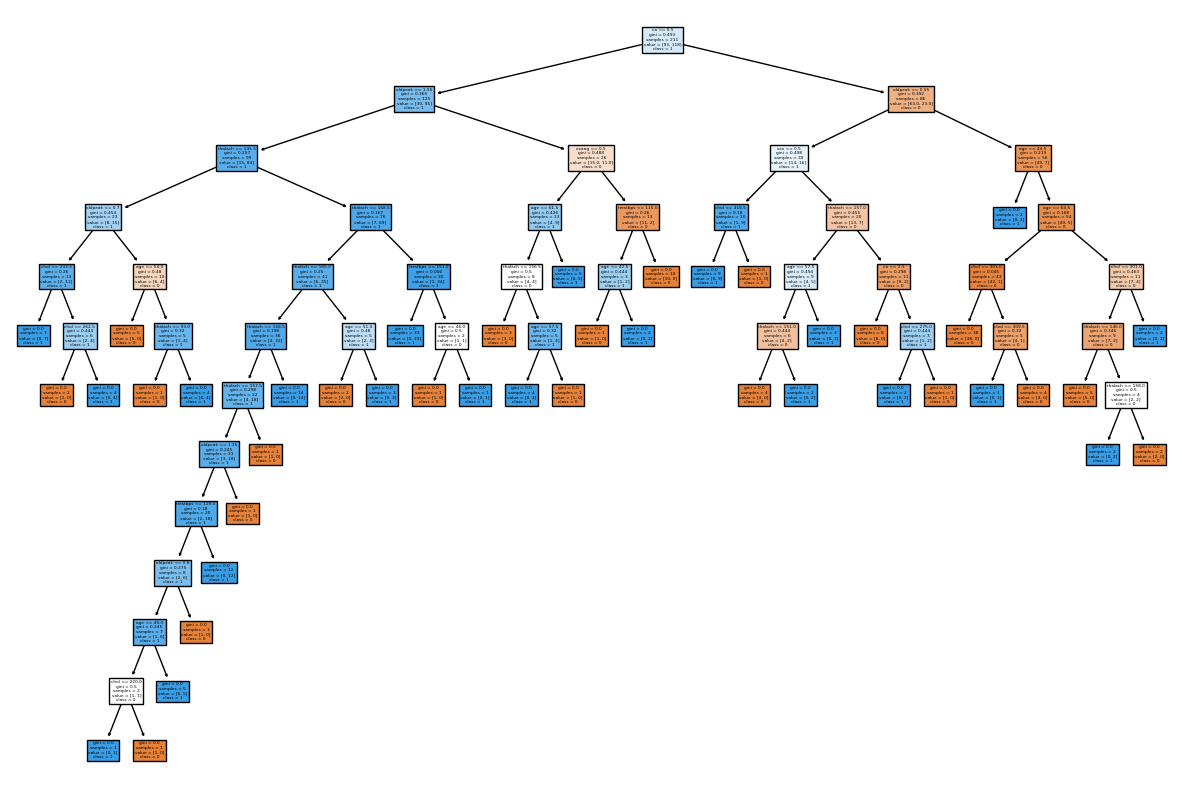

In [33]:
# Train the Decision Tree Classifier
dtree = DecisionTreeClassifier() #criterion='gini'
dtree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Accuracy_XTrain:",accuracy_train)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True, feature_names=X.columns,class_names=['0','1'])

The Decision Tree Classifier achieved high accuracy on both training and test sets, indicating strong performance, though a significant gap may suggest overfitting.The confusion matrix reveals the model’s classification capability, and the plotted tree helps visualize the decision-making logic based on feature splits.

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,5]
}

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dtree = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dtree.predict(x_test)
y_pred_train=best_dtree.predict(x_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train1=accuracy_score(y_train,y_pred_train)
print("Accuracy with best hyperparameters:", accuracy)
print("Accuracy with :",accuracy_train1)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy with best hyperparameters: 0.7472527472527473
Accuracy with : 0.957345971563981


GridSearchCV was used to find the optimal hyperparameters for the Decision Tree model, improving accuracy by testing combinations of criterion, max_depth, min_samples_split, and min_samples_leaf.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming x_train, x_test, y_train, y_test are defined from previous code

# Define the parameter grid for post pruning
param_grid_post_pruning = {
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.5] # Cost Complexity Pruning parameter
}

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Create the GridSearchCV object with post-pruning parameter
grid_search_post_pruning = GridSearchCV(estimator=dtree, param_grid=param_grid_post_pruning, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_post_pruning.fit(x_train, y_train)

# Get the best hyperparameters for post-pruning
best_params_post_pruning = grid_search_post_pruning.best_params_
print("Best Hyperparameters for Post Pruning:", best_params_post_pruning)

# Get the best model after post-pruning
best_dtree_post_pruning = grid_search_post_pruning.best_estimator_

# Evaluate the best model on the test set
y_pred_post_pruning = best_dtree_post_pruning.predict(x_test)
y_t_pred=best_dtree_post_pruning.predict(x_train)
accuracy_post_pruning = accuracy_score(y_test, y_pred_post_pruning)
accuracy_t=accuracy_score(y_train,y_t_pred)
print("Accuracy with best hyperparameters for Post Pruning:", accuracy_post_pruning)
print("Accuracy with post: ",accuracy_t)

Best Hyperparameters for Post Pruning: {'ccp_alpha': 0.0}
Accuracy with best hyperparameters for Post Pruning: 0.7252747252747253
Accuracy with post:  1.0


It is used find the optimal ccp_alpha that balances model complexity and accuracy.

In [36]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

The Decision Tree Classifier was trained on the training data and used to predict both training and testing targets.

In [37]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [38]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [39]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

It visualizes the confusion matrix for predictions vs. actual values using a heatmap.

In [40]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7362637362637363


It gives as train score and test score.

Train Confusion matrix


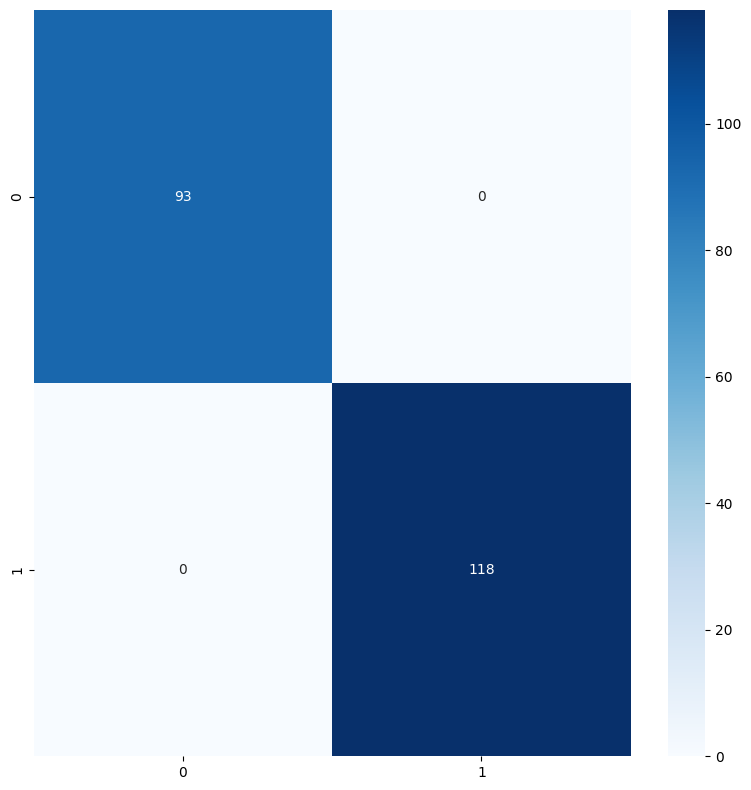

Test Confusion matrix


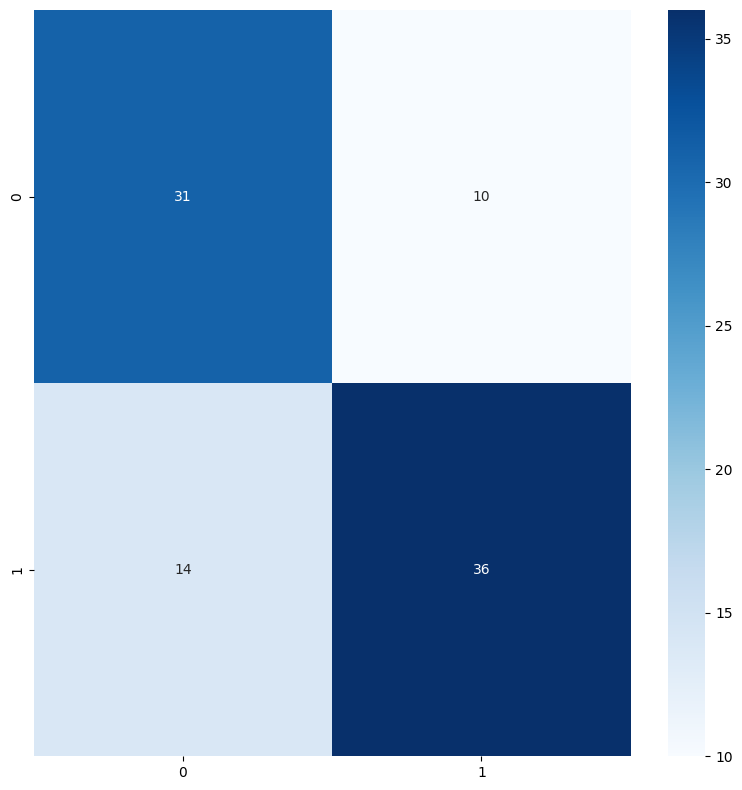

In [41]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

It visualize confusion matrices for training and testing predictions, respectively, helping assess model accuracy and errors.

In [44]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

results = []

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter, splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred) * 100
    results.append({c_parameter_name: input_parameter, 'accuracy': acc_score})

df = pd.DataFrame(results)

print(df)

    max_depth   accuracy
0           1  71.428571
1           2  71.428571
2           3  80.219780
3           4  68.131868
4           5  74.725275
5           6  72.527473
6           7  73.626374
7           8  72.527473
8           9  73.626374
9          10  71.428571
10         11  74.725275
11         12  72.527473
12         13  74.725275
13         14  73.626374
14         15  72.527473


This loop tests different max_depth values for a decision tree to find the optimal depth for best test accuracy.

In [46]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter, splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred) * 100
    results.append({c_parameter_name: input_parameter, 'accuracy': acc_score})

df = pd.DataFrame(results)

print(df)

    max_depth   accuracy
0           1  71.428571
1           2  71.428571
2           3  80.219780
3           4  68.131868
4           5  74.725275
5           6  72.527473
6           7  73.626374
7           8  72.527473
8           9  73.626374
9          10  71.428571
10         11  74.725275
11         12  72.527473
12         13  74.725275
13         14  73.626374
14         15  72.527473
15          1  71.428571
16          2  71.428571
17          3  80.219780
18          4  68.131868
19          5  74.725275
20          6  72.527473
21          7  72.527473
22          8  73.626374
23          9  73.626374
24         10  73.626374
25         11  72.527473
26         12  74.725275
27         13  75.824176
28         14  71.428571
29         15  73.626374


This loop trains decision tree models with varying max_depth values and records the test accuracy for each.

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



The classification_report(y_test_pred, y_test) outputs precision, recall, f1-score, and support for each class.

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.56125, 0.9615384615384616, 'x[7] <= 0.5\ngini = 0.493\nsamples = 211\nvalue = [93, 118]'),
 Text(0.3475, 0.8846153846153846, 'x[6] <= 1.55\ngini = 0.365\nsamples = 125\nvalue = [30, 95]'),
 Text(0.195, 0.8076923076923077, 'x[4] <= 145.5\ngini = 0.257\nsamples = 99\nvalue = [15, 84]'),
 Text(0.08, 0.7307692307692307, 'x[6] <= 0.7\ngini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Text(0.04, 0.6538461538461539, 'x[3] <= 233.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.02, 0.5769230769230769, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.06, 0.5769230769230769, 'x[3] <= 262.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.12, 0.6538461538461539, 'x[0] <= 54.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.1, 0.5769230769230769, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.14, 0.5769230769230769, 'x[4] <= 93.0\ngini = 0.32\ns

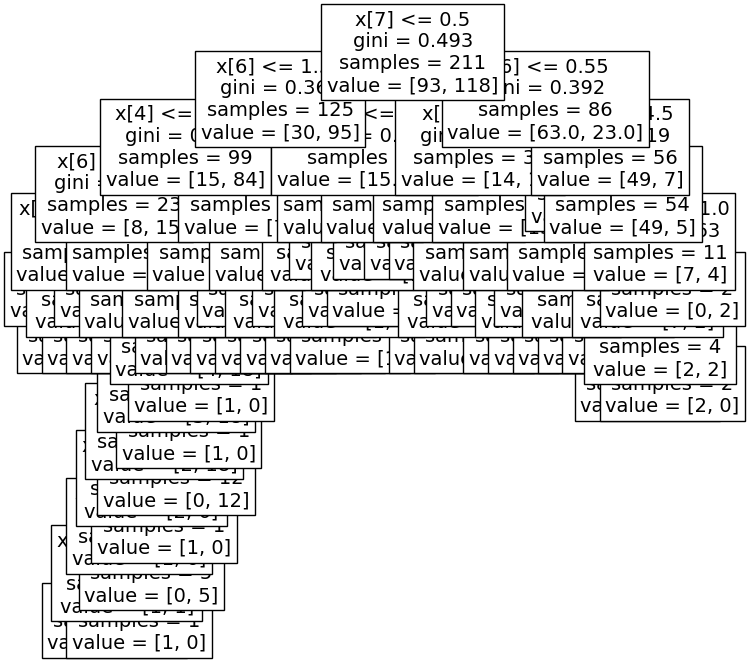

In [50]:
plot_tree(clf,fontsize=14)

The plot_tree(clf, fontsize=14) visualizes the structure of the trained decision tree classifier clf, displaying decision rules at each node.